## Suicide Data

This data set (I call it the "originaldata") contains a combination of numerical and categorical features:

 **Categorical**
 * Country
 * Year: 1985 to 2016
 * Sex: Male/female 
 * Age: Five age groups 
 * Generation

 **Numerical**
 * Population
 * Number of Suicides: Suicide incidences 
 * Suicides per 100k people:normalized version of suicide incidences
 * GDP for year: Gross Domestic Product(a measure of economic development)
 * GDP per capita for year: GDP/population
 * HDI for year : Human Development Index

 I was interested in exploring the possible causes that might increase the risk of suicide in societies, using different machine learning algorithms. Therefore, I decided to enrich the data set by adding more features from the World Development Indicator database to the original suicide data ("extra_data")




In [1]:
# Disabling warnings
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
import scikitplot as skplt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
originaldata = pd.read_csv('/content/master.csv')

originaldata.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k',
                      'country-year', 'yearlyHDI', 'GDPpyear', 'GDPpcapita', 'generation']

originaldata.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,GDPpcapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
#fixing and cleaning the original data  
originaldata['GDPpyear'] = originaldata.apply(lambda x: float(x['GDPpyear'].replace(',', '')), axis=1)
originaldata.sex.astype('category')

0          male
1          male
2        female
3          male
4          male
          ...  
27815    female
27816    female
27817      male
27818    female
27819    female
Name: sex, Length: 27820, dtype: category
Categories (2, object): [female, male]

In [4]:
extra_data = pd.read_csv('/content/suicidedataextrafestures.csv')

extra_data.columns = [
    'country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k', 'country-year', 'yearlyHDI',
    'GDPpyear', 'GDPpcapita', 'generation', 'suicide%', 'Internetusers', 'Expenses', 'employeecompensation',
    'Unemployment', 'Physiciansp1000', 'Legalrights', 'Laborforcetotal', 'Lifeexpectancy', 'Mobilesubscriptionsp100',
    'Refugees', 'Selfemployed', 'electricityacess', 'secondarycompletion']

In [5]:
extra_data.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,GDPpcapita,generation,suicide%,Internetusers,Expenses,employeecompensation,Unemployment,Physiciansp1000,Legalrights,Laborforcetotal,Lifeexpectancy,Mobilesubscriptionsp100,Refugees,Selfemployed,electricityacess,secondarycompletion
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,3264,G.I. Generation,0.055647,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,8.841667e+10,3264,G.I. Generation,0.024286,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,8.841667e+10,3264,Silent,0.012372,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,8.841667e+10,3264,G.I. Generation,0.009115,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,8.841667e+10,3264,Boomers,0.007922,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  15110 non-null  object 
 1   year                     15110 non-null  int64  
 2   sex                      15110 non-null  object 
 3   age                      15110 non-null  object 
 4   suicides_no              15110 non-null  int64  
 5   population               15110 non-null  int64  
 6   suicidesper100k          15110 non-null  float64
 7   country-year             15110 non-null  object 
 8   yearlyHDI                4740 non-null   float64
 9   GDPpyear                 15110 non-null  float64
 10  GDPpcapita               15110 non-null  int64  
 11  generation               15110 non-null  object 
 12  suicide%                 15110 non-null  float64
 13  Internetusers            15002 non-null  float64
 14  Expenses              

# Countries
 The original data set contains data from more than 100 countries during 1985-2016. I've decided to limit the number of countries to make the analysis more insightful. I've chosen 40 countries from different parts of the world that I believe are a good sample of the different regions.

In [7]:
countrynames = [
    'Argentina',
    'Armenia',
    'Australia',
    'Austria',
    'Belgium',
    'Brazil',
    'Bulgaria',
    'Canada',
    'Chile',
    'Colombia',
    'Croatia',
    'Cuba',
    'Czech Republic',
    'Denmark',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    'Japan',
    'Mexico',
    'Netherlands',
    'New Zealand',
    'Norway',
    'Poland',
    'Portugal',
    'Romania',
    'Russian Federation',
    'South Africa',
    'Spain',
    'Sweden',
    'Switzerland',
    'Thailand', 
    'Turkmenistan',
    'Ukraine',
    'United Kingdom', 
    'United States']

Also, the extra data from the WDI database was only available for 1995-2013, so I decided to limit the data to this time period.

In [8]:
df1 = extra_data.copy()
df = df1.iloc[np.where(df1.country == countrynames[0])]
for i, x in enumerate(countrynames[1:]):
    df = df.append(df1.iloc[np.where(df1.country == x)])

df = df[df.year >= 1995]
df = df[df.year <= 2013]

In [9]:
df.sample(10)

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,GDPpcapita,generation,suicide%,Internetusers,Expenses,employeecompensation,Unemployment,Physiciansp1000,Legalrights,Laborforcetotal,Lifeexpectancy,Mobilesubscriptionsp100,Refugees,Selfemployed,electricityacess,secondarycompletion
13223,Thailand,2013,female,55-74 years,190,5336311,3.56,Thailand2013,0.724,4.203330e+11,6917,Boomers,0.003561,28.940000,19.090981,28.924125,0.489,NaN,3.0,39238140,75.378000,137.720543,222.0,20.827999,99.879356,NaN
14408,United Kingdom,2010,female,55-74 years,232,6570278,3.53,United Kingdom2010,0.906,2.441170e+12,41798,Silent,0.003531,85.000000,42.668693,13.579914,7.787,2.6724,NaN,32020789,80.402439,120.910903,153.0,0.321000,100.000000,NaN
5405,France,1995,male,55-74 years,2067,5066300,40.80,France1995,0.825,1.601090e+12,29363,Silent,0.040799,1.637947,47.099920,21.595832,11.836,NaN,NaN,26439012,77.751220,2.253380,15.0,2.047000,100.000000,84.780457
5193,Finland,2008,female,35-54 years,91,716879,12.69,Finland2008,NaN,2.837420e+11,56521,Boomers,0.012694,83.670000,33.459638,9.060082,6.369,2.7350,NaN,2718689,79.568293,128.396757,4.0,0.511000,100.000000,NaN
4231,Cuba,2006,male,55-74 years,318,875342,36.33,Cuba2006,NaN,5.274280e+10,4951,Silent,0.036329,11.159601,NaN,NaN,1.913,6.3286,NaN,4882704,77.864000,1.356111,33580.0,0.684000,97.062775,97.809910
9126,Mexico,1998,female,25-34 years,113,8178534,1.38,Mexico1998,NaN,5.265020e+11,6064,Generation X,0.001382,1.265783,11.161501,17.758092,3.573,1.2000,NaN,38113060,73.625000,3.486991,1016.0,10.282000,96.092755,NaN
10228,Norway,1998,female,25-34 years,23,335200,6.86,Norway1998,NaN,1.541650e+11,37334,Generation X,0.006862,22.560113,35.567129,10.237749,3.737,2.7000,NaN,2374899,78.329268,46.588117,4.0,0.771000,100.000000,100.754753
4311,Cuba,2012,female,25-34 years,16,696377,2.30,Cuba2012,0.772,7.314100e+10,6791,Millenials,0.002298,21.200000,NaN,NaN,3.460,7.2099,NaN,5124682,78.446000,14.938522,7731.0,0.647000,98.220062,92.250730
5569,France,2008,female,15-24 years,108,3865331,2.79,France2008,NaN,2.918380e+12,49901,Millenials,0.002794,70.680000,44.682682,19.561910,7.063,NaN,NaN,29502880,81.214634,93.188778,101.0,0.613000,100.000000,99.467540
6359,Greece,1996,female,25-34 years,9,793234,1.13,Greece1996,NaN,1.458620e+11,14330,Generation X,0.001135,1.395361,44.169723,19.610644,9.655,3.9000,NaN,4627651,77.685366,4.911310,250.0,11.996000,100.000000,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9216 entries, 120 to 14821
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  9216 non-null   object 
 1   year                     9216 non-null   int64  
 2   sex                      9216 non-null   object 
 3   age                      9216 non-null   object 
 4   suicides_no              9216 non-null   int64  
 5   population               9216 non-null   int64  
 6   suicidesper100k          9216 non-null   float64
 7   country-year             9216 non-null   object 
 8   yearlyHDI                3264 non-null   float64
 9   GDPpyear                 9216 non-null   float64
 10  GDPpcapita               9216 non-null   int64  
 11  generation               9216 non-null   object 
 12  suicide%                 9216 non-null   float64
 13  Internetusers            9132 non-null   float64
 14  Expenses             

In [11]:
df.describe()

,year,suicides_no,population,suicidesper100k,yearlyHDI,GDPpyear,GDPpcapita,suicide%,Internetusers,Expenses,employeecompensation,Unemployment,Physiciansp1000,Legalrights,Laborforcetotal,Lifeexpectancy,Mobilesubscriptionsp100,Refugees,Selfemployed,electricityacess,secondarycompletion
count,9216.000000,9216.000000,9.216000e+03,9216.000000,3264.000000,9.216000e+03,9216.000000,9216.000000,9132.000000,8064.000000,8016.000000,9216.000000,7068.000000,456.000000,9.216000e+03,9216.000000,9216.000000,9084.000000,9216.000000,8904.000000,3804.000000
mean,2004.014323,434.531467,3.202290e+06,13.851477,0.824066,9.252719e+11,24606.537760,0.013851,36.930210,31.866772,15.356784,8.441493,3.005708,5.605263,1.999384e+07,76.117285,68.214043,15568.048877,3.119477,98.924920,91.624802
std,5.485463,1282.435901,5.136535e+06,17.589271,0.082826,2.100168e+12,20363.438549,0.017589,30.066979,9.963289,7.503388,5.070628,1.168056,2.500526,2.902525e+07,5.221885,46.950846,57958.497230,5.189117,3.969308,9.847003
min,1995.000000,0.000000,5.100000e+03,0.000000,0.605000,1.468317e+09,426.000000,0.000000,0.000092,10.806881,2.891704,0.489000,0.238400,2.000000,1.536790e+05,53.444000,0.000000,1.000000,0.041000,57.600000,60.124860
25%,1999.000000,20.000000,4.742375e+05,2.290000,0.766500,1.097512e+11,6148.250000,0.002286,7.388924,22.684684,10.143090,5.095750,2.219000,4.000000,3.432706e+06,73.711585,19.399408,32.000000,0.506000,100.000000,85.829530
50%,2004.000000,88.000000,1.124090e+06,7.865000,0.850500,2.592840e+11,22092.000000,0.007864,31.650939,33.002654,13.967510,7.525500,3.069300,5.000000,6.699688e+06,77.678049,76.073163,215.000000,1.066000,100.000000,94.091430
75%,2009.000000,298.250000,3.834023e+06,18.700000,0.889250,7.009715e+11,38492.750000,0.018700,64.430000,39.695864,20.118837,10.170000,3.665000,7.000000,2.342629e+07,79.785976,108.470731,2174.000000,2.875750,100.000000,98.677190
max,2013.000000,21706.000000,4.380521e+07,165.960000,0.942000,1.669150e+13,109804.000000,0.165961,96.546800,62.186783,48.962685,33.473000,7.334100,12.000000,1.588311e+08,83.331951,172.121808,551744.000000,31.235001,100.000000,116.367400


# Exploratory Data Analysis


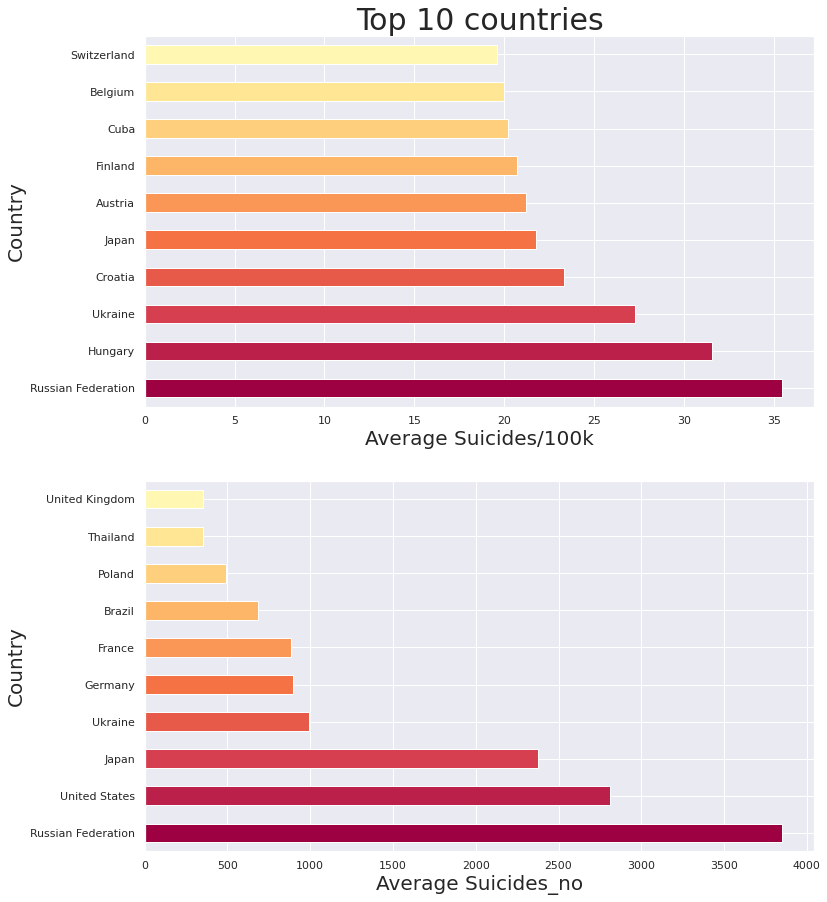

In [12]:
plt.figure(figsize=(12, 15))
col = plt.cm.Spectral(np.linspace(0, 1, 20))


plt.subplot(211)
df.groupby(['country']).suicidesper100k.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries', fontsize=30)

plt.subplot(212)
df.groupby(['country']).suicides_no.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

## Suicides Per 100k population

Text(0.5, 0, 'Suicides per 100K')

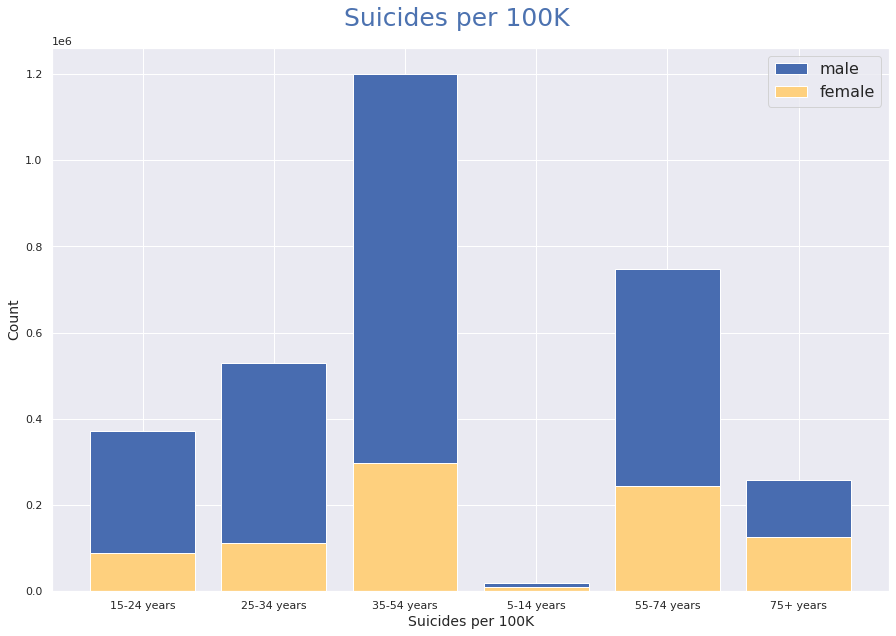

In [13]:

plt.figure(figsize=(15,10))

agedistf = pd.DataFrame(df.groupby('sex').get_group('female').groupby('age').suicides_no.sum())

agedistm = pd.DataFrame(df.groupby('sex').get_group('male').groupby('age').suicides_no.sum())
plt.bar(agedistm.index, agedistm.suicides_no, color=col[18])
plt.bar(agedistf.index, agedistf.suicides_no, color=col[7])
plt.figtext(.5,.91,'Suicides per 100K', color='b', fontsize=25, ha='center')

plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=14)

plt.xlabel('Suicides per 100K', fontsize=14)

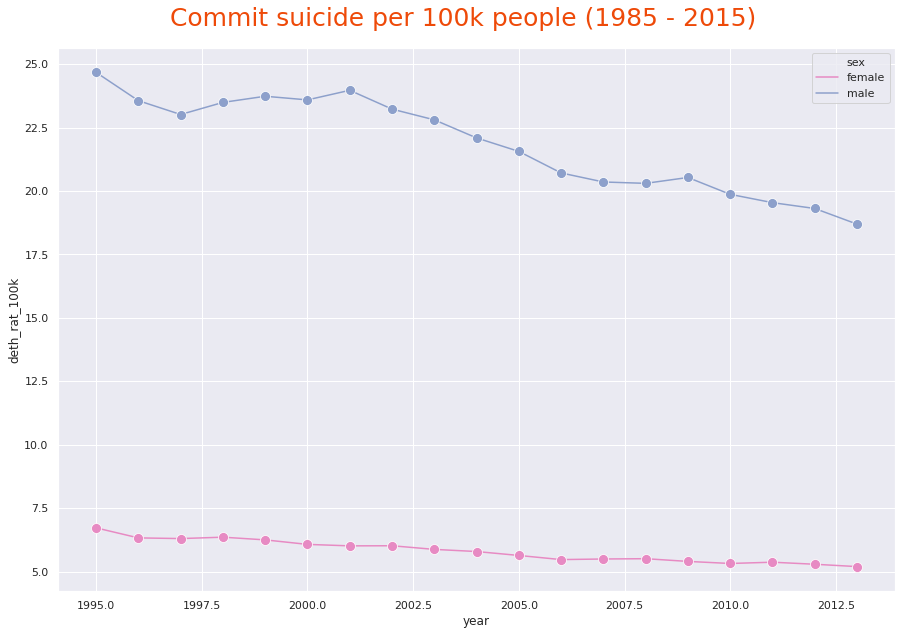

In [14]:
data_popk_year_sex = df.groupby(by=['year', 'sex']).agg({'suicides_no':['sum'], 'population': ['sum']})
data_popk_year_sex.columns = ['total_suicide', 'total_population']
data_popk_year_sex = data_popk_year_sex.reset_index()

data_popk_year_sex['deth_rat_100k'] = data_popk_year_sex['total_suicide'] / data_popk_year_sex['total_population'] * 100000
# data_popk_year
plt.figure(figsize=(15, 10))
flatui = ["#e78ac3", "#8da0cb"]
color = sns.color_palette(flatui)
sns.set(style="darkgrid")
sns.lineplot(x="year", y="deth_rat_100k", hue='sex', marker='o', markersize=10, color='#ec2915', data=data_popk_year_sex, palette=color)

plt.figtext(.5,.91,'Commit suicide per 100k people (1985 - 2015)', color='#ee4a09', fontsize=25, ha='center')
plt.show()

So suicide of per 100k people we can see men has more tendency than women to commit suicide.

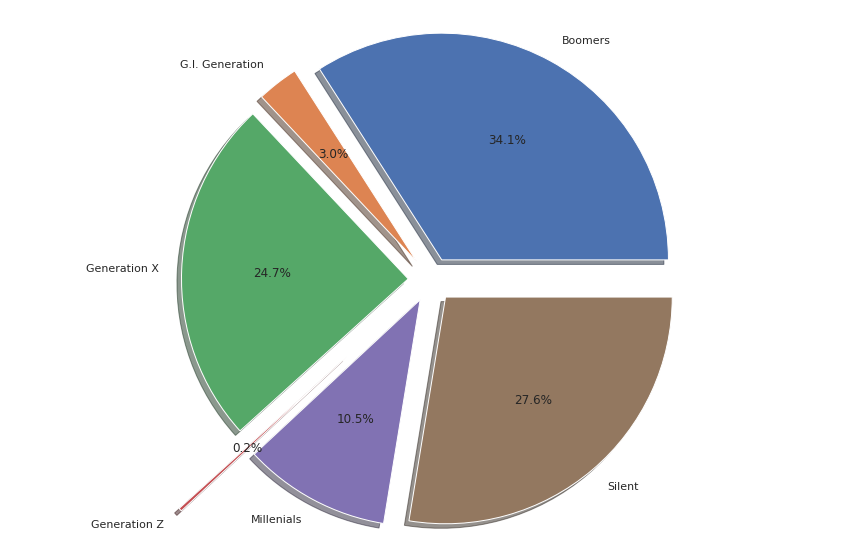

In [15]:
gen_sui = df.pivot_table('suicides_no', index='generation', aggfunc='sum')
x = gen_sui.index.values
y = gen_sui.values
y = y.reshape(6,)

fig, ax = plt.subplots(figsize=(15,10))
explode = (0.1,0.1,0.1,0.5,0.1,0.1)
ax.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

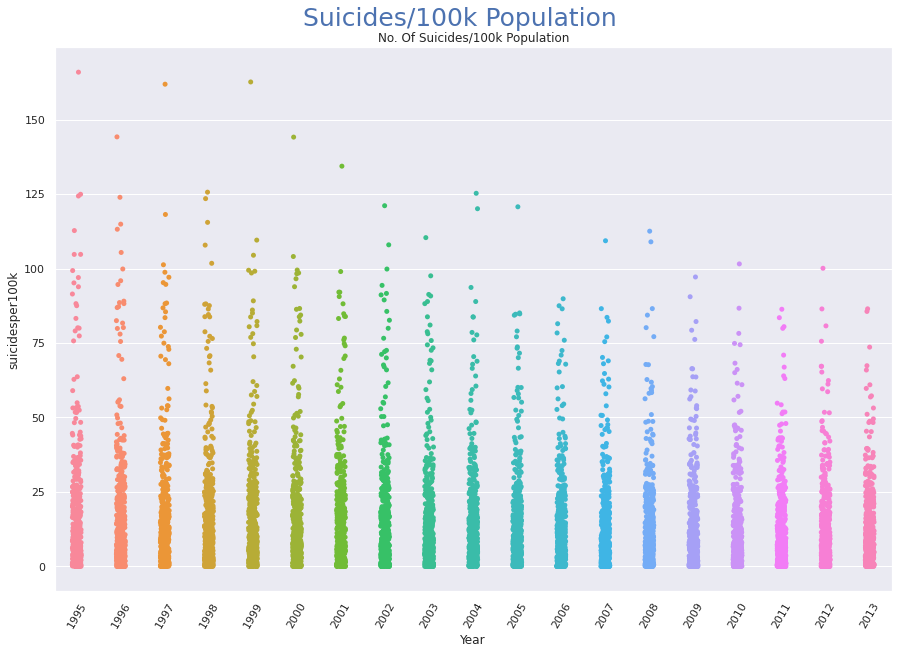

In [16]:
plt.figure(figsize=(15,10))
sns.stripplot(x="year", y='suicidesper100k', data=df)
plt.title('No. Of Suicides/100k Population')
plt.xlabel('Year')
plt.figtext(.5,.91,'Suicides/100k Population', color='b', fontsize=25, ha='center')
plt.xticks(rotation=60)
plt.show()

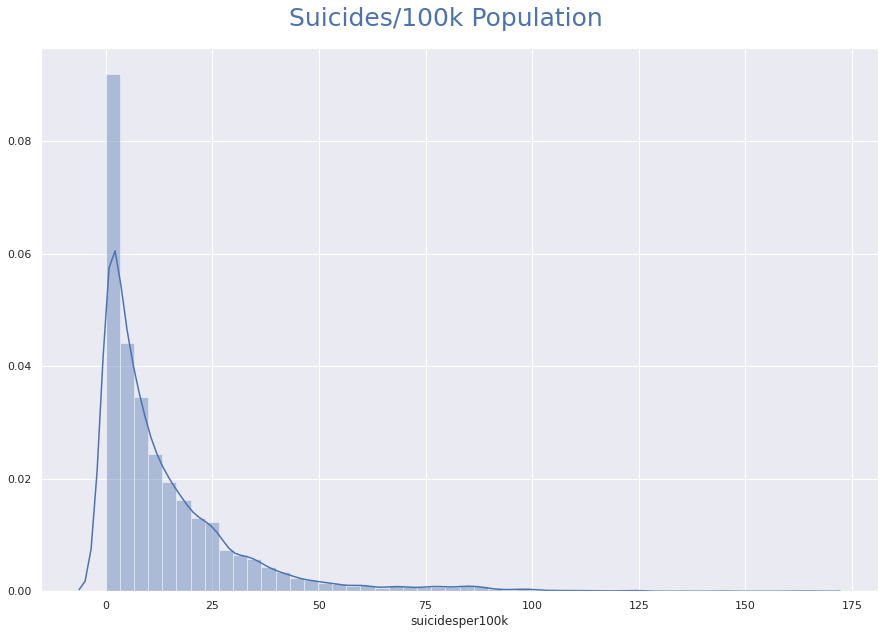

In [17]:
plt.figure(figsize=(15,10))
plt.figtext(.5,.91,'Suicides/100k Population', color='b', fontsize=25, ha='center')
sns.distplot(df['suicidesper100k'])
plt.show()

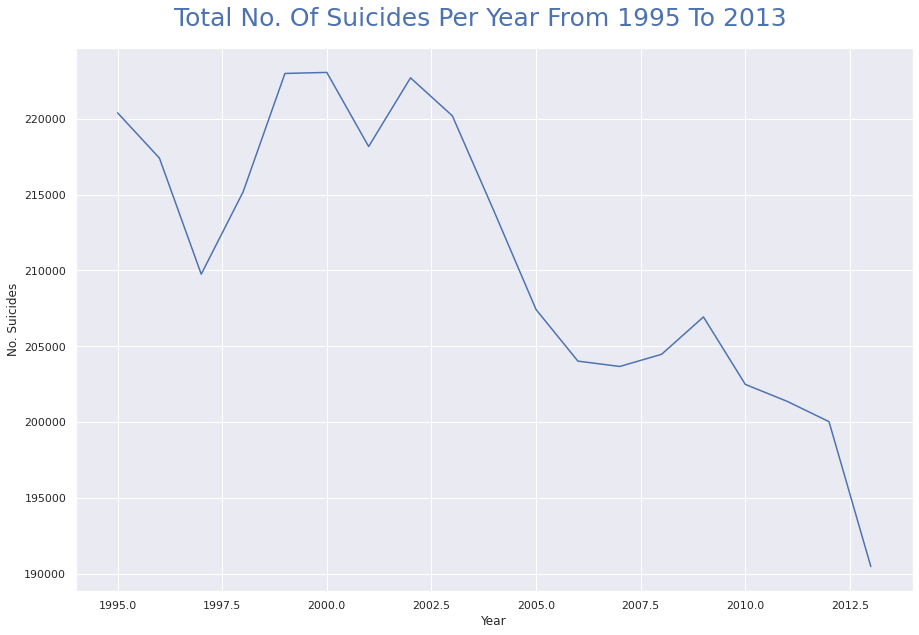

In [18]:
data_per_year = df.groupby('year').sum()

data_per_year['suicides_no'].plot(figsize=(15,10))
plt.figtext(.5,.91,'Total No. Of Suicides Per Year From 1995 To 2013', color='b', fontsize=25, ha='center')
plt.ylabel('No. Suicides')
plt.xlabel('Year')
plt.xlim((df.year.min() - 1), (df.year.max() + 1))
plt.show()

## By Age

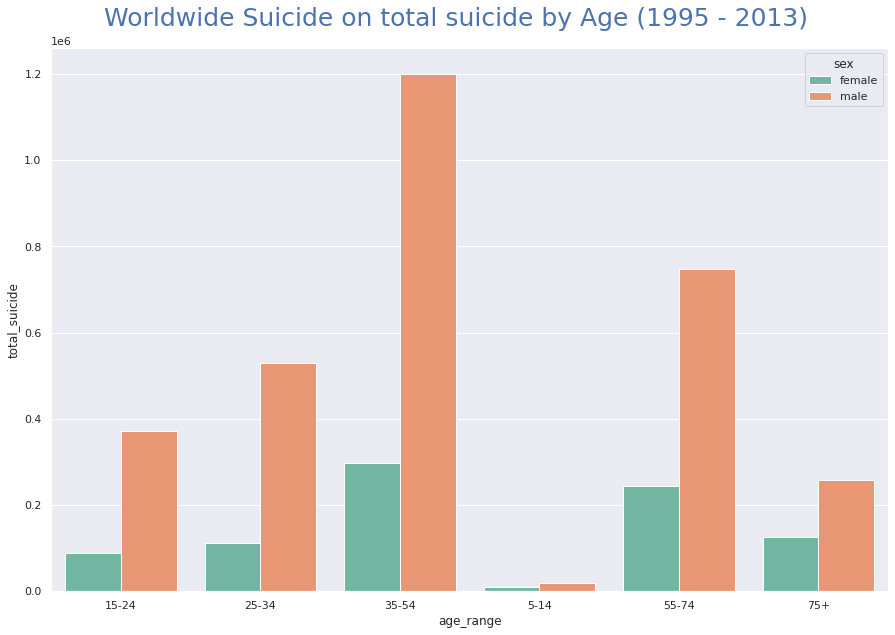

In [19]:
data_suicide = pd.DataFrame.copy(df)

data_suicide['age_range'] = data_suicide['age'].map(lambda x:x.split(' ')[0])

data_sc_no = data_suicide.groupby(by=['age_range', 'sex']).agg({'suicides_no': ['sum']})
data_sc_no.columns = ['total_suicide']
data_sc_no.reset_index(inplace=True)
# data_sc_no

color = sns.color_palette("Set2")
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='age_range', y='total_suicide', hue='sex', data=data_sc_no, palette=color)

# plt.setp(autotexts, size=10, color="w")
plt.figtext(.5,.91,'Worldwide Suicide on total suicide by Age (1995 - 2013)', color='b', fontsize=25, ha='center')
plt.show()


## By Year

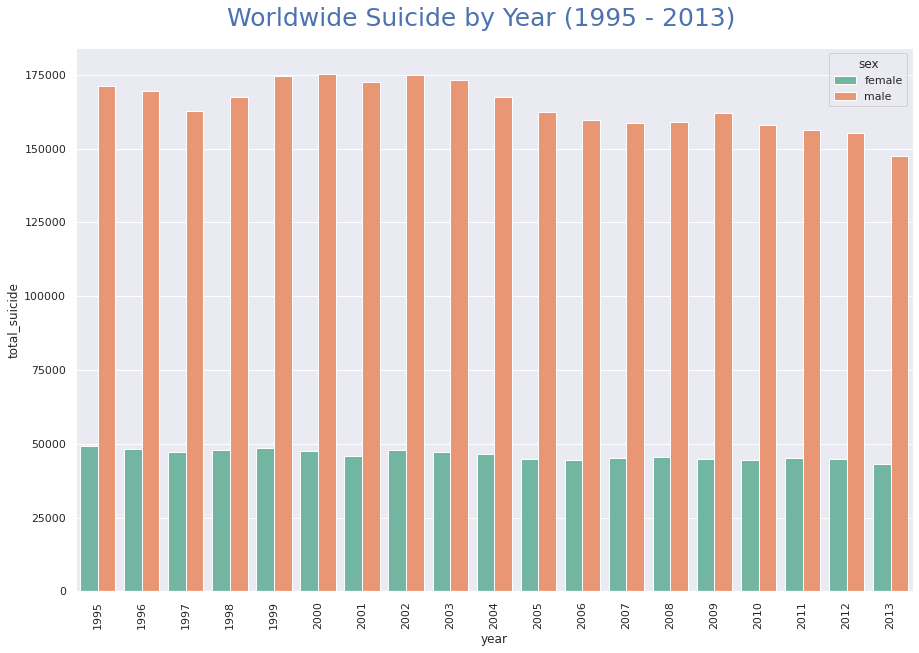

In [20]:
data_year_no = df.groupby(by=['year', 'sex']).agg({'suicides_no': ['sum']})
data_year_no.columns = ['total_suicide']
data_year_no.reset_index(inplace=True)
data_year_no

color = sns.color_palette("Set2")
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='year', y='total_suicide', hue='sex', data=data_year_no, palette=color)
plt.xticks(rotation=90)

plt.figtext(.5,.91,'Worldwide Suicide by Year (1995 - 2013)', color='b', fontsize=25, ha='center')
plt.show()

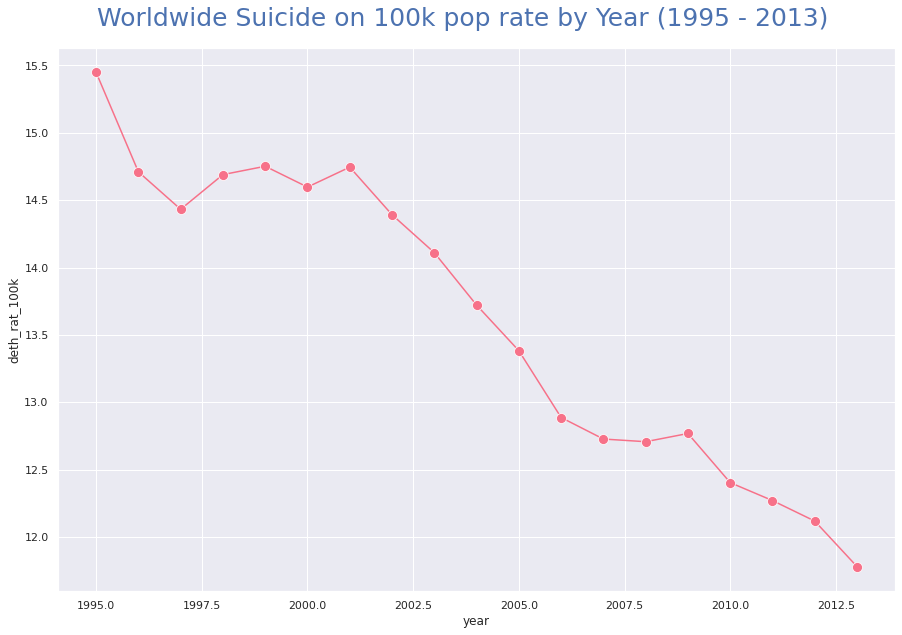

In [21]:
data_popk_year = df.groupby(by=['year']).agg({'suicides_no':['sum'], 'population': ['sum']})
data_popk_year.columns = ['total_suicide', 'total_population']
data_popk_year = data_popk_year.reset_index()

data_popk_year['deth_rat_100k'] = data_popk_year['total_suicide'] / data_popk_year['total_population'] * 100000
# data_popk_year
plt.figure(figsize=(15, 10))
sns.lineplot(x="year", y="deth_rat_100k", marker='o', markersize=10, color='#f77189', data=data_popk_year)

plt.figtext(.5,.91,'Worldwide Suicide on 100k pop rate by Year (1995 - 2013)', color='b', fontsize=25, ha='center')
plt.show()

## By Year and Age

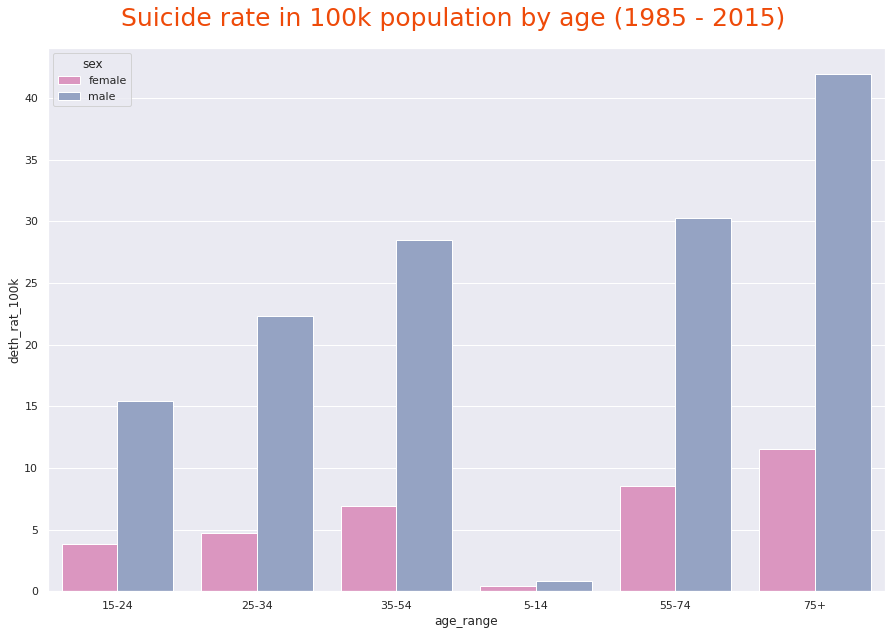

In [22]:
data_sc_pop = data_suicide.groupby(by=['age_range', 'sex']).agg({'suicides_no': ['sum'], 'population': ['sum']})
data_sc_pop.columns = ['total_suicide', 'total_population']
data_sc_pop.reset_index(inplace=True)

data_sc_pop['deth_rat_100k'] = data_sc_pop['total_suicide'] / data_sc_pop['total_population'] * 100000
data_sc_pop

flatui = ["#e78ac3", "#8da0cb"]
color = sns.color_palette(flatui)
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='age_range', y='deth_rat_100k', hue='sex', data=data_sc_pop, palette=color)

# plt.setp(autotexts, size=10, color="w")
plt.figtext(.5,.91,'Suicide rate in 100k population by age (1985 - 2015)', color='#ee4a09', fontsize=25, ha='center')
plt.show()

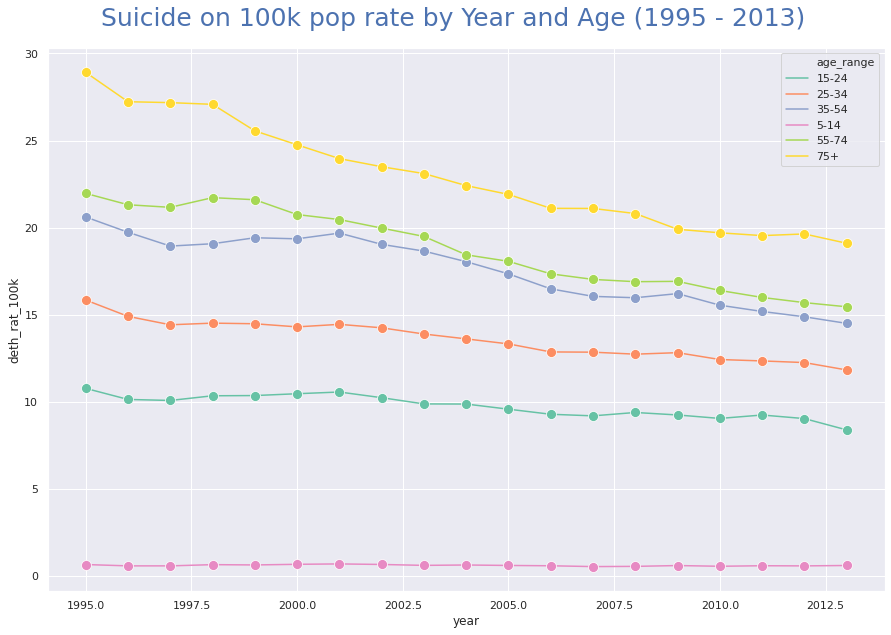

In [23]:
data_popk_year_age = data_suicide.groupby(by=['year', 'age_range']).agg({'suicides_no':['sum'], 'population': ['sum']})
data_popk_year_age.columns = ['total_suicide', 'total_population']
data_popk_year_age = data_popk_year_age.reset_index()

data_popk_year_age['deth_rat_100k'] = data_popk_year_age['total_suicide'] / data_popk_year_age['total_population'] * 100000
# data_popk_year
plt.figure(figsize=(15, 10))
color = sns.color_palette('Set2', n_colors=6)
sns.set(style="darkgrid")
sns.lineplot(x="year", y="deth_rat_100k", hue='age_range', marker='o', markersize=10, color='#ec2915', data=data_popk_year_age, palette=color)

plt.figtext(.5,.91,'Suicide on 100k pop rate by Year and Age (1995 - 2013)', color='b', fontsize=25, ha='center')
plt.show()

## Top 20 Countries

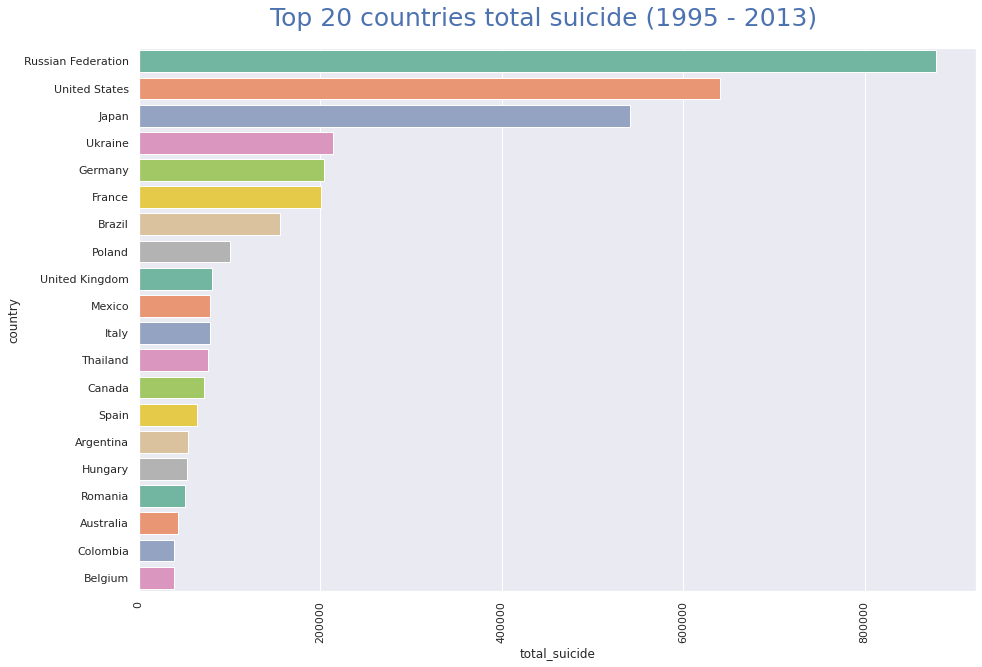

In [24]:
data_country_total = df.groupby(by=['country']).agg({'suicides_no': ['sum']})
data_country_total.columns = ['total_suicide']
data_country_total.reset_index(inplace=True)
data_country_total = data_country_total.sort_values(by=['total_suicide'], ascending=False).head(20)
# data_country_total

color = sns.color_palette("Set2")
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='total_suicide', y='country', data=data_country_total, palette=color)
plt.xticks(rotation=90)

plt.figtext(.5,.91,'Top 20 countries total suicide (1995 - 2013)', color='b', fontsize=25, ha='center')
plt.show()

In [25]:
fig = px.pie(data_country_total, values='total_suicide', names='country')
fig.update_traces(textposition='inside')
fig.show()

In [26]:
data_map = df.groupby(by=['country']).agg({"suicides_no": ['sum']})
data_map.columns = ['total_suicide']
data_map.reset_index(inplace=True)
data_map

fig = px.choropleth(data_map, locations="country", locationmode='country names',
                    color="total_suicide", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale='sunset')

fig.update_layout(
    title="Suicide By Country on Map (1995 - 2013)",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="RebeccaPurple"
    )
)

fig.show()

In [27]:
df.groupby(['year', 'sex']).suicides_no.sum();

## Due to Gender

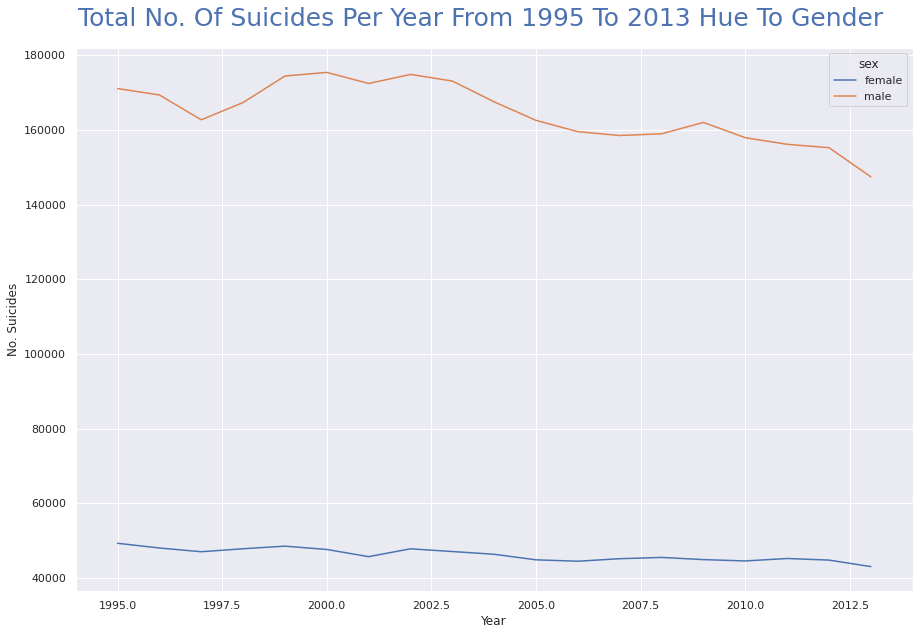

In [28]:
df.pivot_table('suicides_no', index='year', columns='sex', aggfunc='sum').plot(figsize=(15,10))
plt.figtext(.5,.91,'Total No. Of Suicides Per Year From 1995 To 2013 Hue To Gender', color='b', fontsize=25, ha='center')
plt.ylabel('No. Suicides')
plt.xlabel('Year')
plt.xlim((df.year.min() - 1), (df.year.max() + 1))
plt.show()

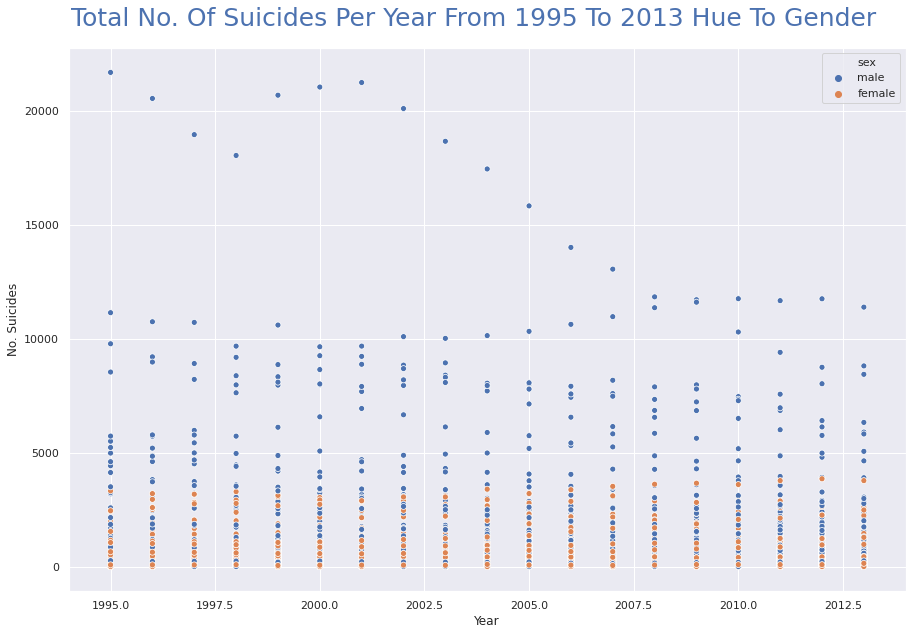

In [29]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='year', y='suicides_no', data=df, hue='sex') 
plt.figtext(.5,.91,'Total No. Of Suicides Per Year From 1995 To 2013 Hue To Gender', color='b', fontsize=25, ha='center')
plt.ylabel('No. Suicides')
plt.xlabel('Year')
plt.xlim((df.year.min() - 1), (df.year.max() + 1))
plt.show()

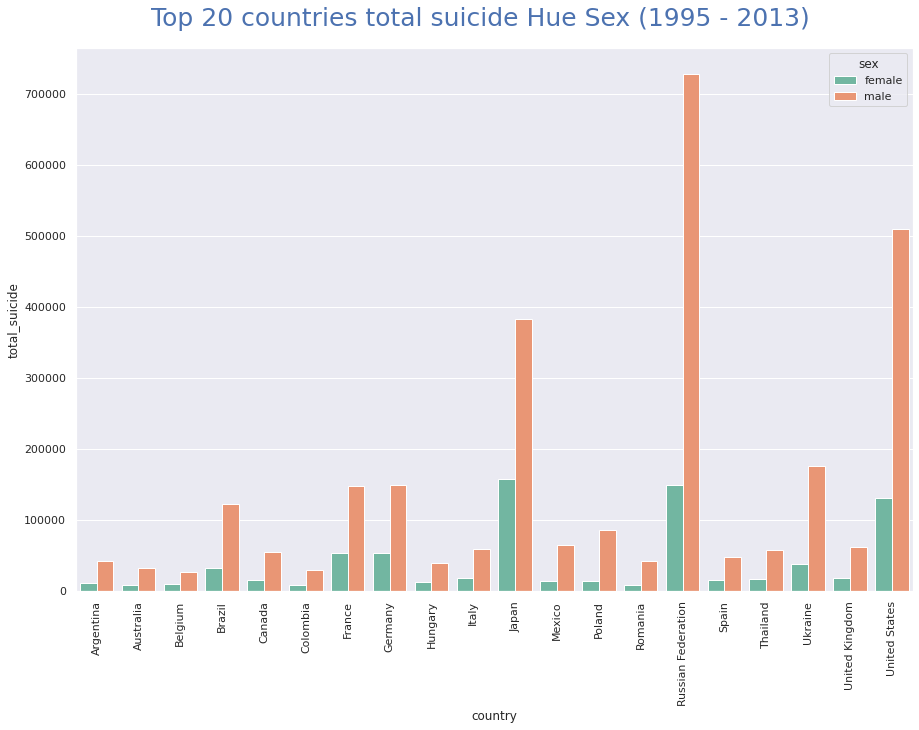

In [30]:
data_country_no = df.groupby(by=['country', 'sex']).agg({'suicides_no': ['sum']})
data_country_no.columns = ['total_suicide']
data_country_no.reset_index(inplace=True)
data_country_name = data_country_no.sort_values(by=['total_suicide'], ascending=False)
data_country_name = data_country_name.head(27)
data_country_name = data_country_name['country']

data_country_no = data_country_no[data_country_no['country'].isin(data_country_name)]
# data_country_no.head()

color = sns.color_palette("Set2")
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='country', y='total_suicide', hue='sex', data=data_country_no, palette=color)
plt.xticks(rotation=90)

plt.figtext(.5,.91,'Top 20 countries total suicide Hue Sex (1995 - 2013)', color='b', fontsize=25, ha='center')
plt.show()

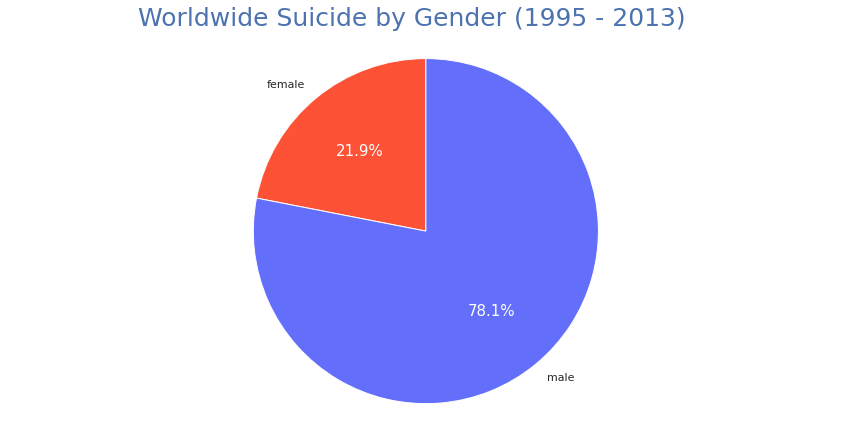

In [31]:
data_grp_mf = df.groupby(by=['sex']).agg({"suicides_no": ['sum']})
data_grp_mf.columns = ['total_suicide']
data_grp_mf.reset_index(inplace=True)
# data_grp_mf

fig1, ax1 = plt.subplots(figsize=(15, 7))
wedges, texts, autotexts = ax1.pie(data_grp_mf['total_suicide'], labels=data_grp_mf['sex'], autopct='%1.1f%%', startangle=90, colors=['#fd5235', '#636efa'])
ax1.axis('equal')

plt.setp(autotexts, size=15, color="w")
plt.figtext(.5,.91,'Worldwide Suicide by Gender (1995 - 2013)', color='b', fontsize=25, ha='center')
plt.show()

It is clearly indicate that men do more suicide than women. men suicide rate is 76.9% and women is 23.1%. you can be say that, population can be a fact. ok lets see about population ways suicide.

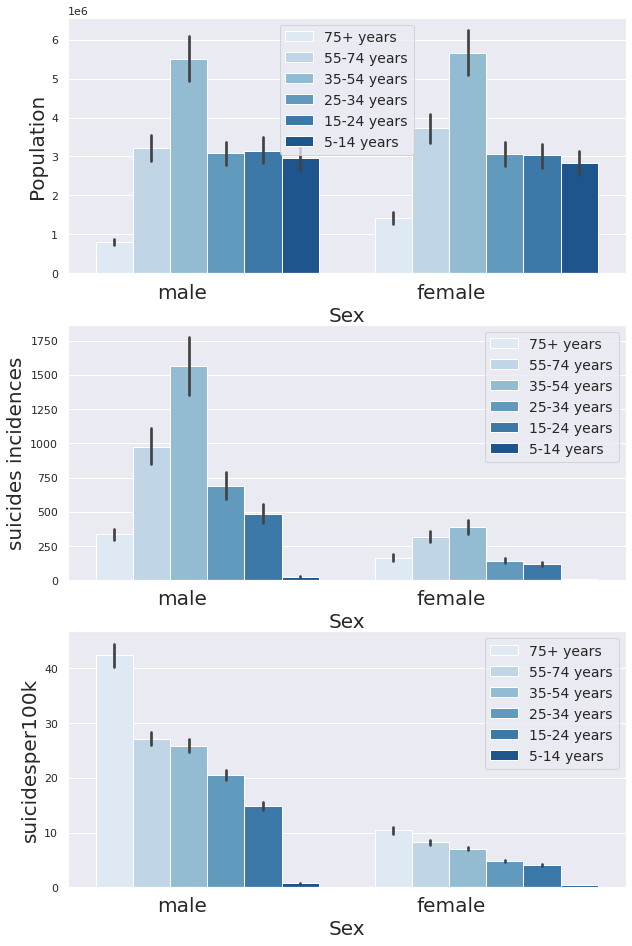

In [32]:
plt.figure(figsize=(10, 16))

plt.subplot(311)

sns.barplot(x='sex', y='population', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14, loc='best')

plt.subplot(313)

sns.barplot(x='sex', y='suicidesper100k', hue='age', data=df,palette="Blues")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicidesper100k',fontsize=20);
plt.xlabel('Sex',fontsize=20);
plt.legend(fontsize=14);

plt.subplot(312)
sns.barplot(x='sex', y='suicides_no', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides incidences', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14)

## By GDP

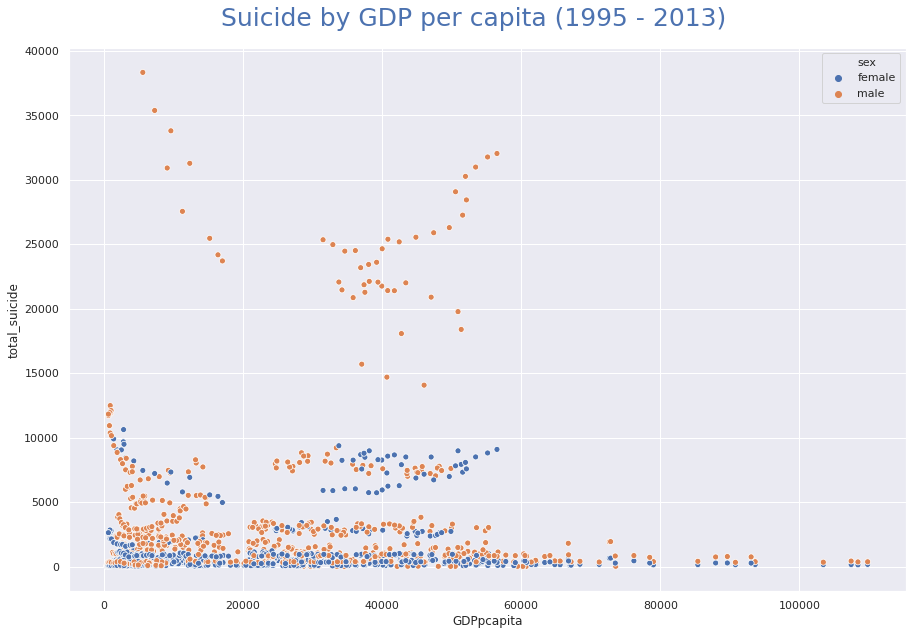

In [33]:
data_grp_gdp_2 = df.groupby(by=['country', 'year', 'sex', 'GDPpcapita']).agg({"suicides_no": ['sum']})
data_grp_gdp_2.columns = ["total_suicide"]
data_grp_gdp_2.reset_index(inplace=True)
# "Russian Federation" "United States" "Japan"

# data_grp_gdp = data_grp_gdp.sort_values(by=['gdp_per_capita ($)'], ascending=False).head(200)
data_grp_gdp_2

data_grp_gdp_cng = data_grp_gdp_2[data_grp_gdp_2['total_suicide'] < 40000]
plt.figure(figsize=(15, 10))
sns.scatterplot(x="GDPpcapita", y="total_suicide", hue="sex", data=data_grp_gdp_cng)

plt.figtext(.5,.91,'Suicide by GDP per capita (1995 - 2013)', color='b', fontsize=25, ha='center')
plt.show()

Text(0.5, 0.91, 'Top 4 countries total suicide by GDP per capita (1995 - 2013)')

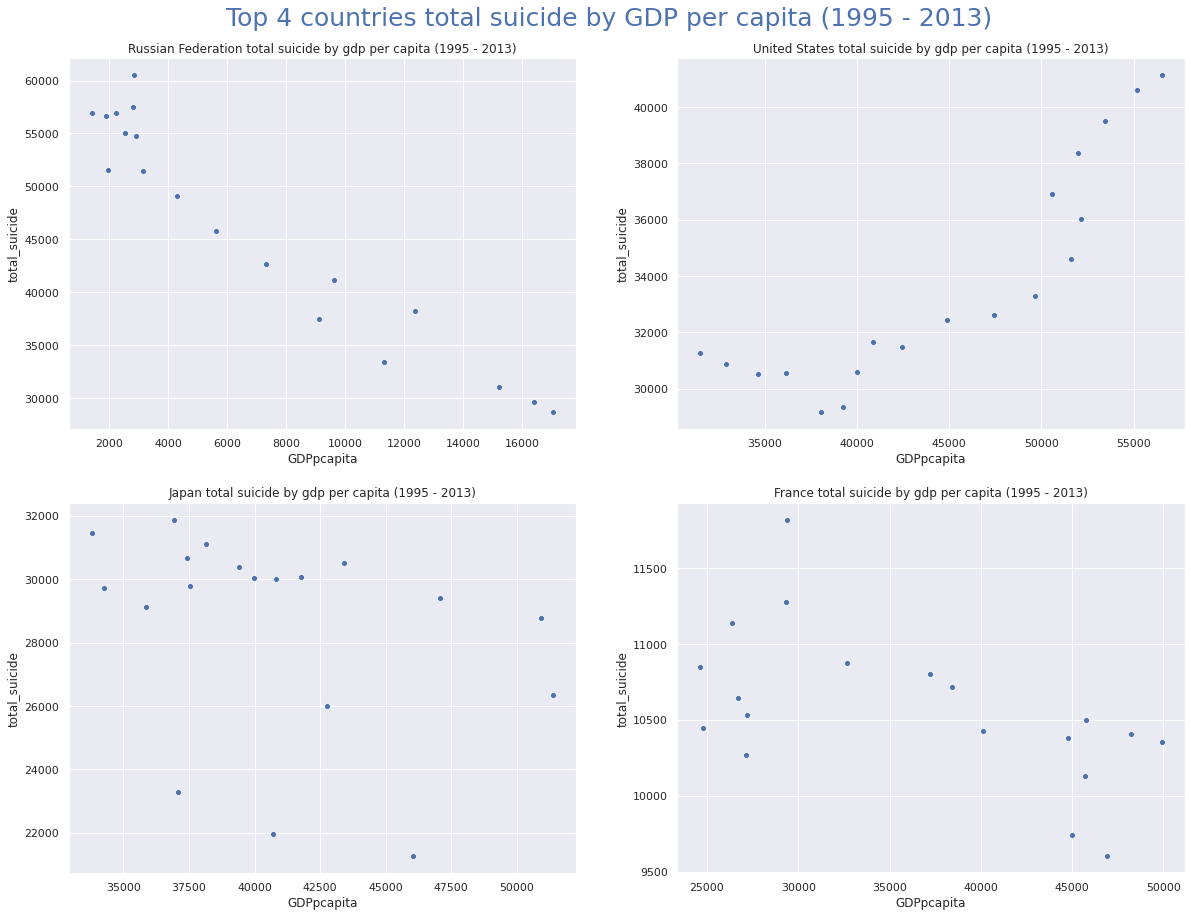

In [34]:
plt.figure(figsize=(20, 15))
countries = ['Russian Federation', 'United States', 'Japan', 'France']
for i, column in enumerate(countries):
    plt.subplot(2, 2, i+1)

    data_grp_gdp = df.groupby(by=['country', 'year', 'GDPpcapita']).agg({"suicides_no": ['sum']})
    data_grp_gdp.columns = ["total_suicide"]
    data_grp_gdp.reset_index(inplace=True)
    # data_grp_gdp
    data_grp_gdp_cn = data_grp_gdp[data_grp_gdp['country'] == column]

    sns.scatterplot(x="GDPpcapita", y="total_suicide", data=data_grp_gdp_cn)
    plt.title(f"{column} total suicide by gdp per capita (1995 - 2013)")
    
plt.figtext(.5,.91,'Top 4 countries total suicide by GDP per capita (1995 - 2013)', color='b', fontsize=25, ha='center')
# plt.show()

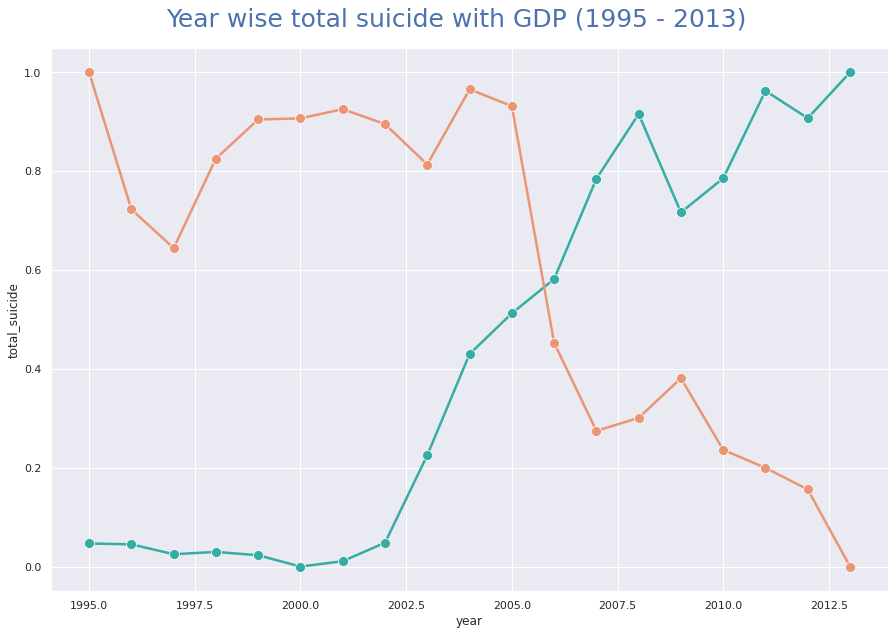

In [35]:
test_data = df.groupby(by=['year']).agg({"GDPpcapita":['mean'], "suicides_no": ['mean']})
test_data.columns = ["gdp_per_capita", "total_suicide"]
# test_data.reset_index(inplace=True)
test_data

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
# min_max_scaller = RobustScaler()
min_max_scaller = preprocessing.MinMaxScaler()
gdp_scale_data = min_max_scaller.fit_transform(test_data)
gdp_scale_data 


suicide_socio_economic_mean_scaled = pd.DataFrame(gdp_scale_data)
suicide_socio_economic_mean_scaled.columns = test_data.columns
suicide_socio_economic_mean_scaled.index = test_data.index
test_data_final = suicide_socio_economic_mean_scaled.reset_index()
test_data_final

plt.figure(figsize=(15, 10))
color = sns.color_palette('husl', n_colors=2)
sns.set(style="darkgrid")
sns.lineplot(x="year", y="gdp_per_capita", data=test_data_final, palette="tab10", marker='o', markersize=10, linewidth=2.5, color='#36ada4')
sns.lineplot(x="year", y="total_suicide", data=test_data_final, palette="tab10", marker='o', markersize=10, linewidth=2.5, color='#e99675')

plt.figtext(.5,.91,'Year wise total suicide with GDP (1995 - 2013)', color='b', fontsize=25, ha='center')
plt.show()

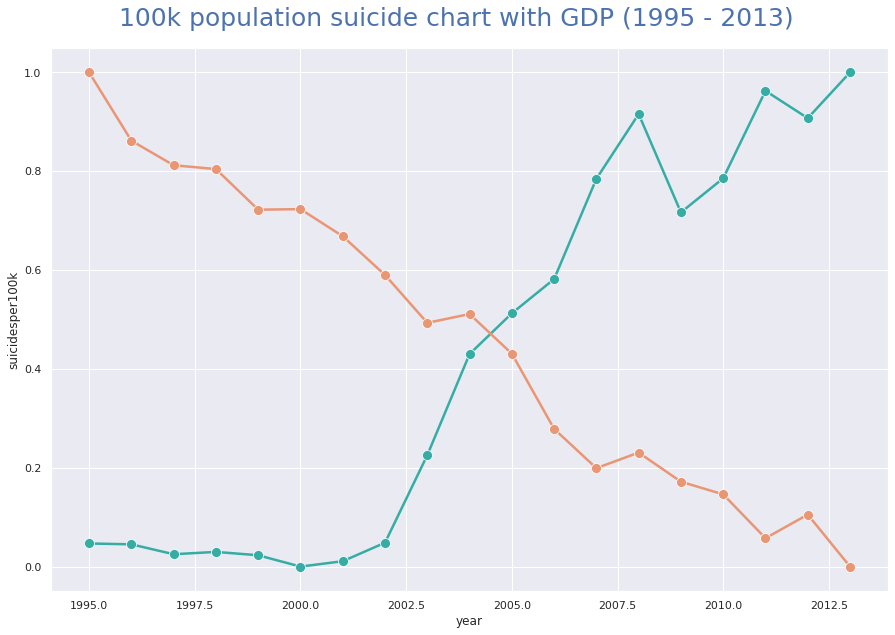

In [36]:
suicide_socio_economic_mean= df.pivot_table(['suicidesper100k','GDPpcapita'],['year'], aggfunc='mean')
x = suicide_socio_economic_mean.values

from sklearn import preprocessing
min_max_scaller = preprocessing.MinMaxScaler()
gdp_scale_data = min_max_scaller.fit_transform(x)
gdp_scale_data 

suicide_socio_economic_mean_scaled = pd.DataFrame(gdp_scale_data)
suicide_socio_economic_mean_scaled.columns = suicide_socio_economic_mean.columns
suicide_socio_economic_mean_scaled.index = suicide_socio_economic_mean.index
suicide_socio_economic_mean_scaled.reset_index(inplace=True)

plt.figure(figsize=(15, 10))
sns.lineplot(x="year", y="GDPpcapita", data=suicide_socio_economic_mean_scaled, palette="tab10", marker='o', markersize=10, linewidth=2.5, color='#36ada4')
sns.lineplot(x="year", y="suicidesper100k", data=suicide_socio_economic_mean_scaled, palette="tab10", marker='o', markersize=10, linewidth=2.5, color='#e99675')

plt.figtext(.5,.91,'100k population suicide chart with GDP (1995 - 2013)', color='b', fontsize=25, ha='center')
plt.show()

Suicides have declined since 2004, when GDP grew around the world. but some countries have some difference. like United States.

## 3d plot with gdp_per_capita, year, suicides/100k pop

No handles with labels found to put in legend.


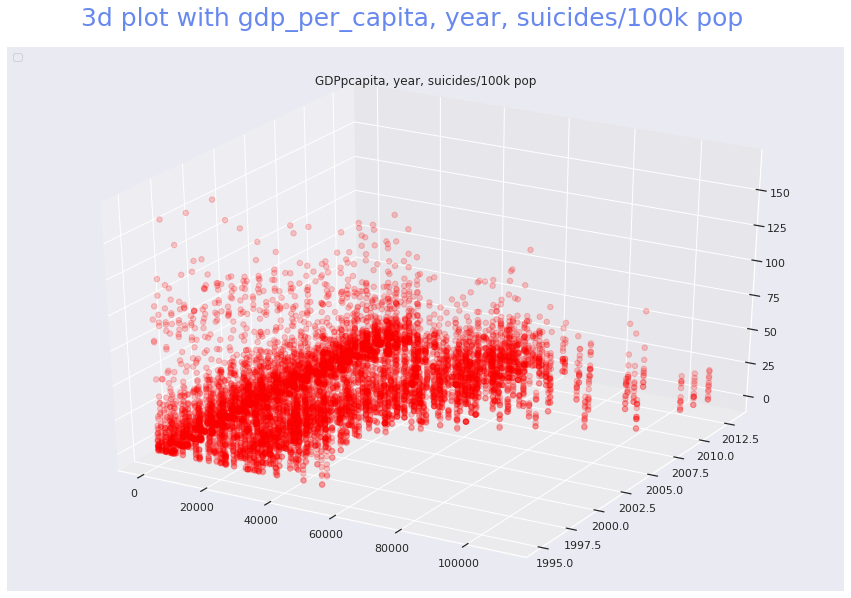

In [37]:
from mpl_toolkits.mplot3d import axes3d
suicide_3d = data_suicide.copy()

sns.set(rc={'figure.figsize':(15,10)})
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(suicide_3d['GDPpcapita'], suicide_3d['year'], suicide_3d['suicidesper100k'], alpha=0.2, c="red", s=30) 
plt.title('GDPpcapita, year, suicides/100k pop')
plt.legend(loc=2)
plt.figtext(.5,.91,'3d plot with gdp_per_capita, year, suicides/100k pop', color='#6788ee', fontsize=25, ha='center')
plt.show()

From all the extra features added from the WDI database, I'm using 11 features for exploring. These are basically the features with fewer null values.

totalfeatures: 
'country', 'year','GDPpyear','GDPpcapita','employeecompensation','Unemployment',
 'Lifeexpectancy','Refugees','Selfemployed','Internetusers','population'.
      
 I'm aslo lifting the fine subsample level of sex and age group. I'm creating a new pandas data frame "total", with a new column "suicides" as the total value of Suicides per 100k of population per country per year, calculated by summing over both sexes and age groups.

In [38]:
features = ['country', 'year', 'GDPpyear', 'GDPpcapita', 'employeecompensation', 'Unemployment',
            'Lifeexpectancy', 'Refugees', 'Selfemployed', 'Internetusers']

total = df[features].groupby('country').get_group(countrynames[0]).groupby('year').mean()
total['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('country').get_group(countrynames[0]).groupby('year').sum()
total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(countrynames[0]).groupby('year').sum()

total['country'] = countrynames[0]

for i, x in enumerate(countrynames[1:]):
    suicides = df[features].groupby('country').get_group(x).groupby('year').mean()
    suicides['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('country').get_group(x).groupby('year').sum()
    total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(x).groupby('year').sum()
  
    suicides['country'] = x
    total = total.append(suicides)

total.reset_index(inplace=True)
sort = True

In [39]:
totalfeatures = ['country', 'year', 'GDPpyear', 'GDPpcapita', 'employeecompensation', 'Unemployment',
                 'Lifeexpectancy', 'Refugees', 'Selfemployed', 'Internetusers', 'population']

Text(0.5, 0, 'GDP')

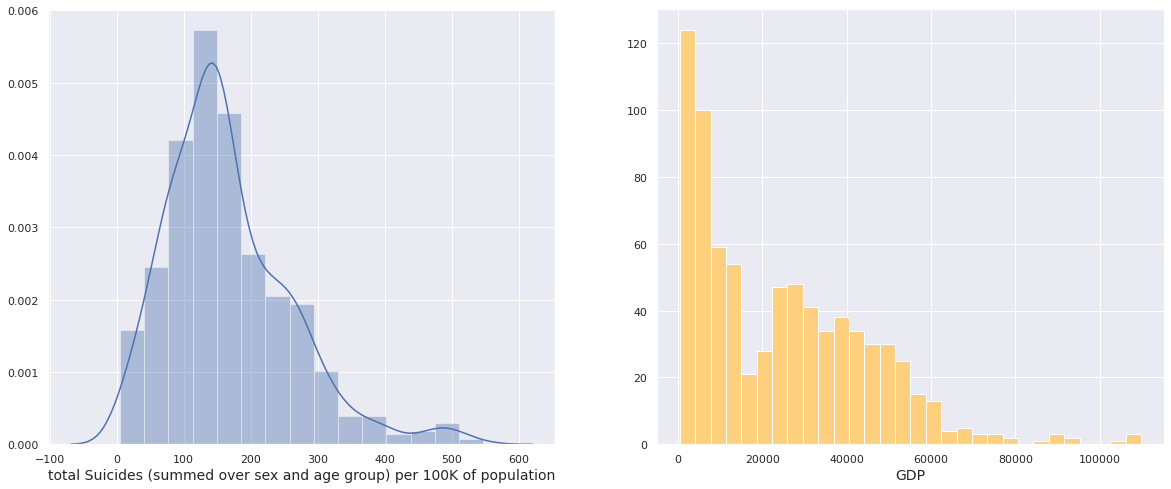

In [40]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.distplot(total.Suicides, bins=15)
plt.xlabel('total Suicides (summed over sex and age group) per 100K of population', fontsize=14)

plt.subplot(122)
plt.hist(total.GDPpcapita, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=14)

Text(0.5, 0, 'year')

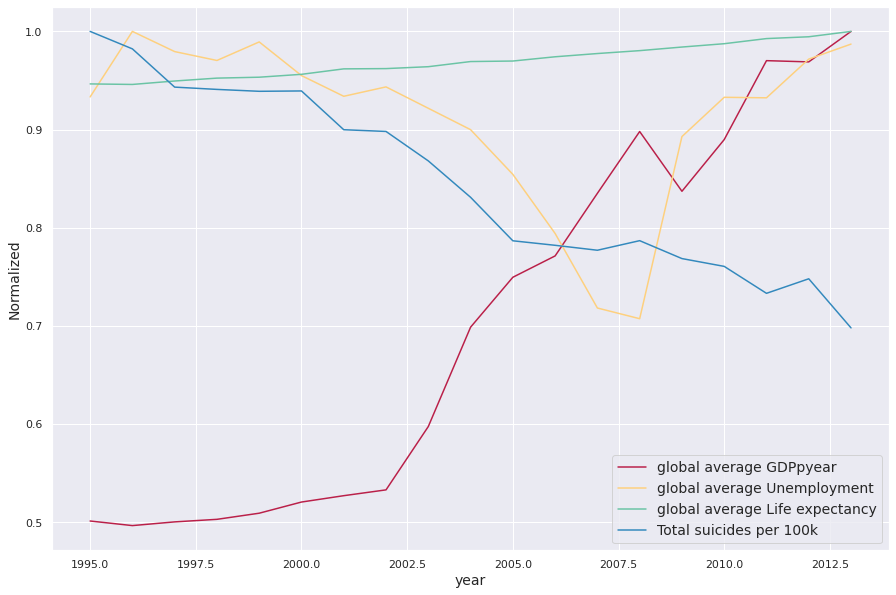

In [41]:
plt.figure(figsize=(15, 10))

suicides = df[['year', 'GDPpyear', 'Selfemployed', 'Unemployment', 'Lifeexpectancy']].groupby('year').mean()
suicides['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('year').sum()

plt.plot(suicides.index, suicides.GDPpyear/suicides.GDPpyear.max(), color=col[1])
plt.plot(suicides.index, suicides.Unemployment/suicides.Unemployment.max(), color=col[7])
plt.plot(suicides.index, suicides.Lifeexpectancy/suicides.Lifeexpectancy.max(), color=col[15])
plt.plot(suicides.index, suicides.Suicides/suicides.Suicides.max(), color=col[17])
plt.legend(['global average GDPpyear', 'global average Unemployment', 'global average Life expectancy', 'Total suicides per 100k'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

# Correlations
# Calculating the correlation matrix for all chosen features:

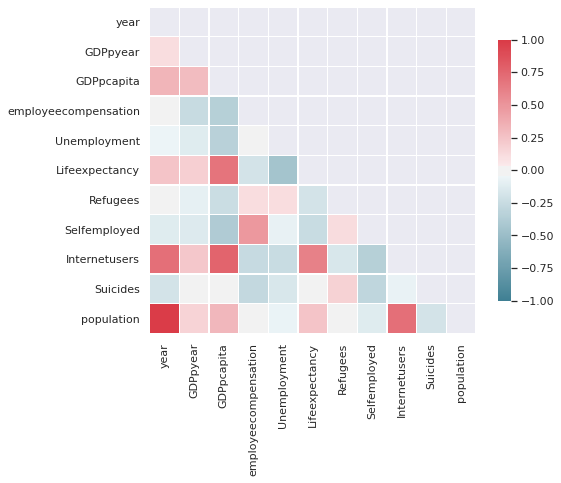

In [42]:
corr = total.corr()

# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8});

The feature "Internetusers" is strongly correlated with GDP features, as expected. "Lifeexpectancy" also shows strong corrlaiton with GDP per capital. This should be noted when evaluating feature importances from model outputs. Other features do not show strong correlations.



```
# This is formatted as code
```

# Data preprocessing 
 Cleaning the data, replacing null values with appropriate replacements


In [43]:
# Cleaning the data, replacing null values with appropriate replacements

total.Internetusers.fillna(total.Internetusers. min(), inplace=True)
total.Refugees.fillna(8, inplace=True)
total.employeecompensation.fillna(total.employeecompensation.mean(), inplace=True)
total.population.fillna(total.population.mean(), inplace=True)

# Binary classification for suicide risk
 I decided to perform a binary classification on the suicide data, by assigning risk classes based on the suicide incidences per 100k of the population as high/low suicide risk. Adding an extra column to the "total" data frame as 'risk'. 
 * Suicides<mean(Suicides) --> low risk --> class 0
 *   Suicides>mean(Suicides) --> high risk --> class 1

In [44]:
total['risk'] = total.Suicides.copy()

total['risk'] = np.where(total.risk < total.Suicides.mean(), 0, 1)

Text(0.5, 0, 'Suicides')

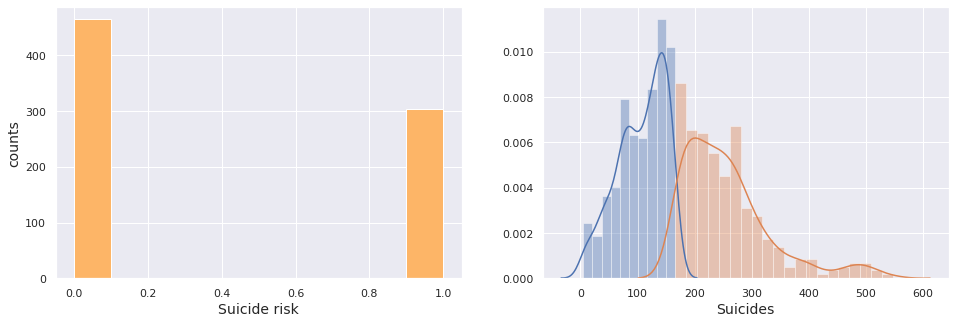

In [45]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.hist(total.risk, color=col[6])
plt.ylabel('counts', fontsize=14)
plt.xlabel('Suicide risk', fontsize=14)

plt.subplot(122)
sns.distplot(total.Suicides[total.risk == 0], bins=10)
sns.distplot(total.Suicides[total.risk == 1], bins=20)  
plt.xlabel('Suicides', fontsize=14)

In [46]:
# Label encoding countries

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

total.country = le.fit_transform(total.country)  # Alphabetic order [0:40]
total.country.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [47]:
# Preparing data for modeling

X = np.asarray(total[totalfeatures])
y = np.asarray(total['risk'])


# Applying standard scaler on data, since ML algorithms work with the assumption that the data is normally distributed

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [48]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (576, 11) (576,)
Test set: (192, 11) (192,)


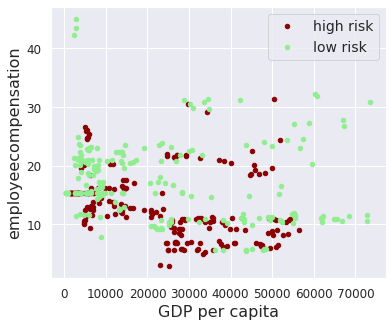

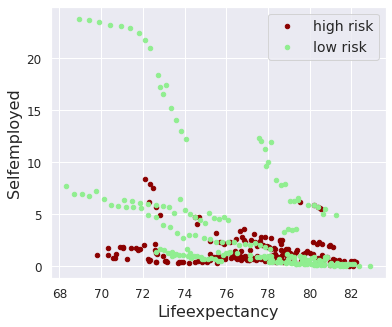

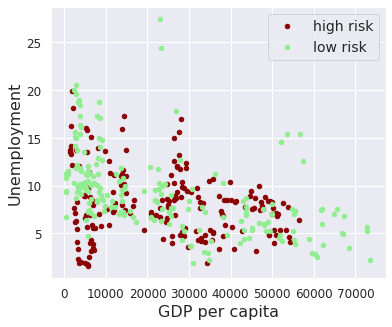

In [49]:
ax1 = total[total['risk'] == 1][0:200].plot(kind='scatter', x='GDPpcapita', y='employeecompensation', color='DarkRed',
                                            label='high risk', figsize=(6, 5), fontsize=12)
total[total['risk'] == 0][0:200].plot(kind='scatter', x='GDPpcapita', y='employeecompensation', color='LightGreen',
                                      label='low risk', ax=ax1)

plt.ylabel('employeecompensation', fontsize=16)
plt.xlabel('GDP per capita', fontsize=16)
plt.legend(fontsize=14)


ax1 = total[total['risk'] == 1][0:200].plot(kind='scatter', x='Lifeexpectancy', y='Selfemployed', color='DarkRed',
                                            label='high risk', figsize=(6, 5), fontsize=12)
total[total['risk'] == 0][0:200].plot(kind='scatter', x='Lifeexpectancy', y='Selfemployed', color='LightGreen',
                                      label='low risk', ax=ax1);

plt.ylabel('Selfemployed', fontsize=16)
plt.xlabel('Lifeexpectancy', fontsize=16)
plt.legend(fontsize=14)


ax1 = total[total['risk'] == 1][0:200].plot(kind='scatter', x='GDPpcapita', y='Unemployment', color='DarkRed',
                                            label='high risk', figsize=(6, 5), fontsize=12);
total[total['risk'] == 0][0:200].plot(kind='scatter', x='GDPpcapita', y='Unemployment', color='LightGreen',
                                     label='low risk', ax=ax1);

plt.ylabel('Unemployment', fontsize=16)
plt.xlabel('GDP per capita', fontsize=16);
plt.legend(fontsize=14);

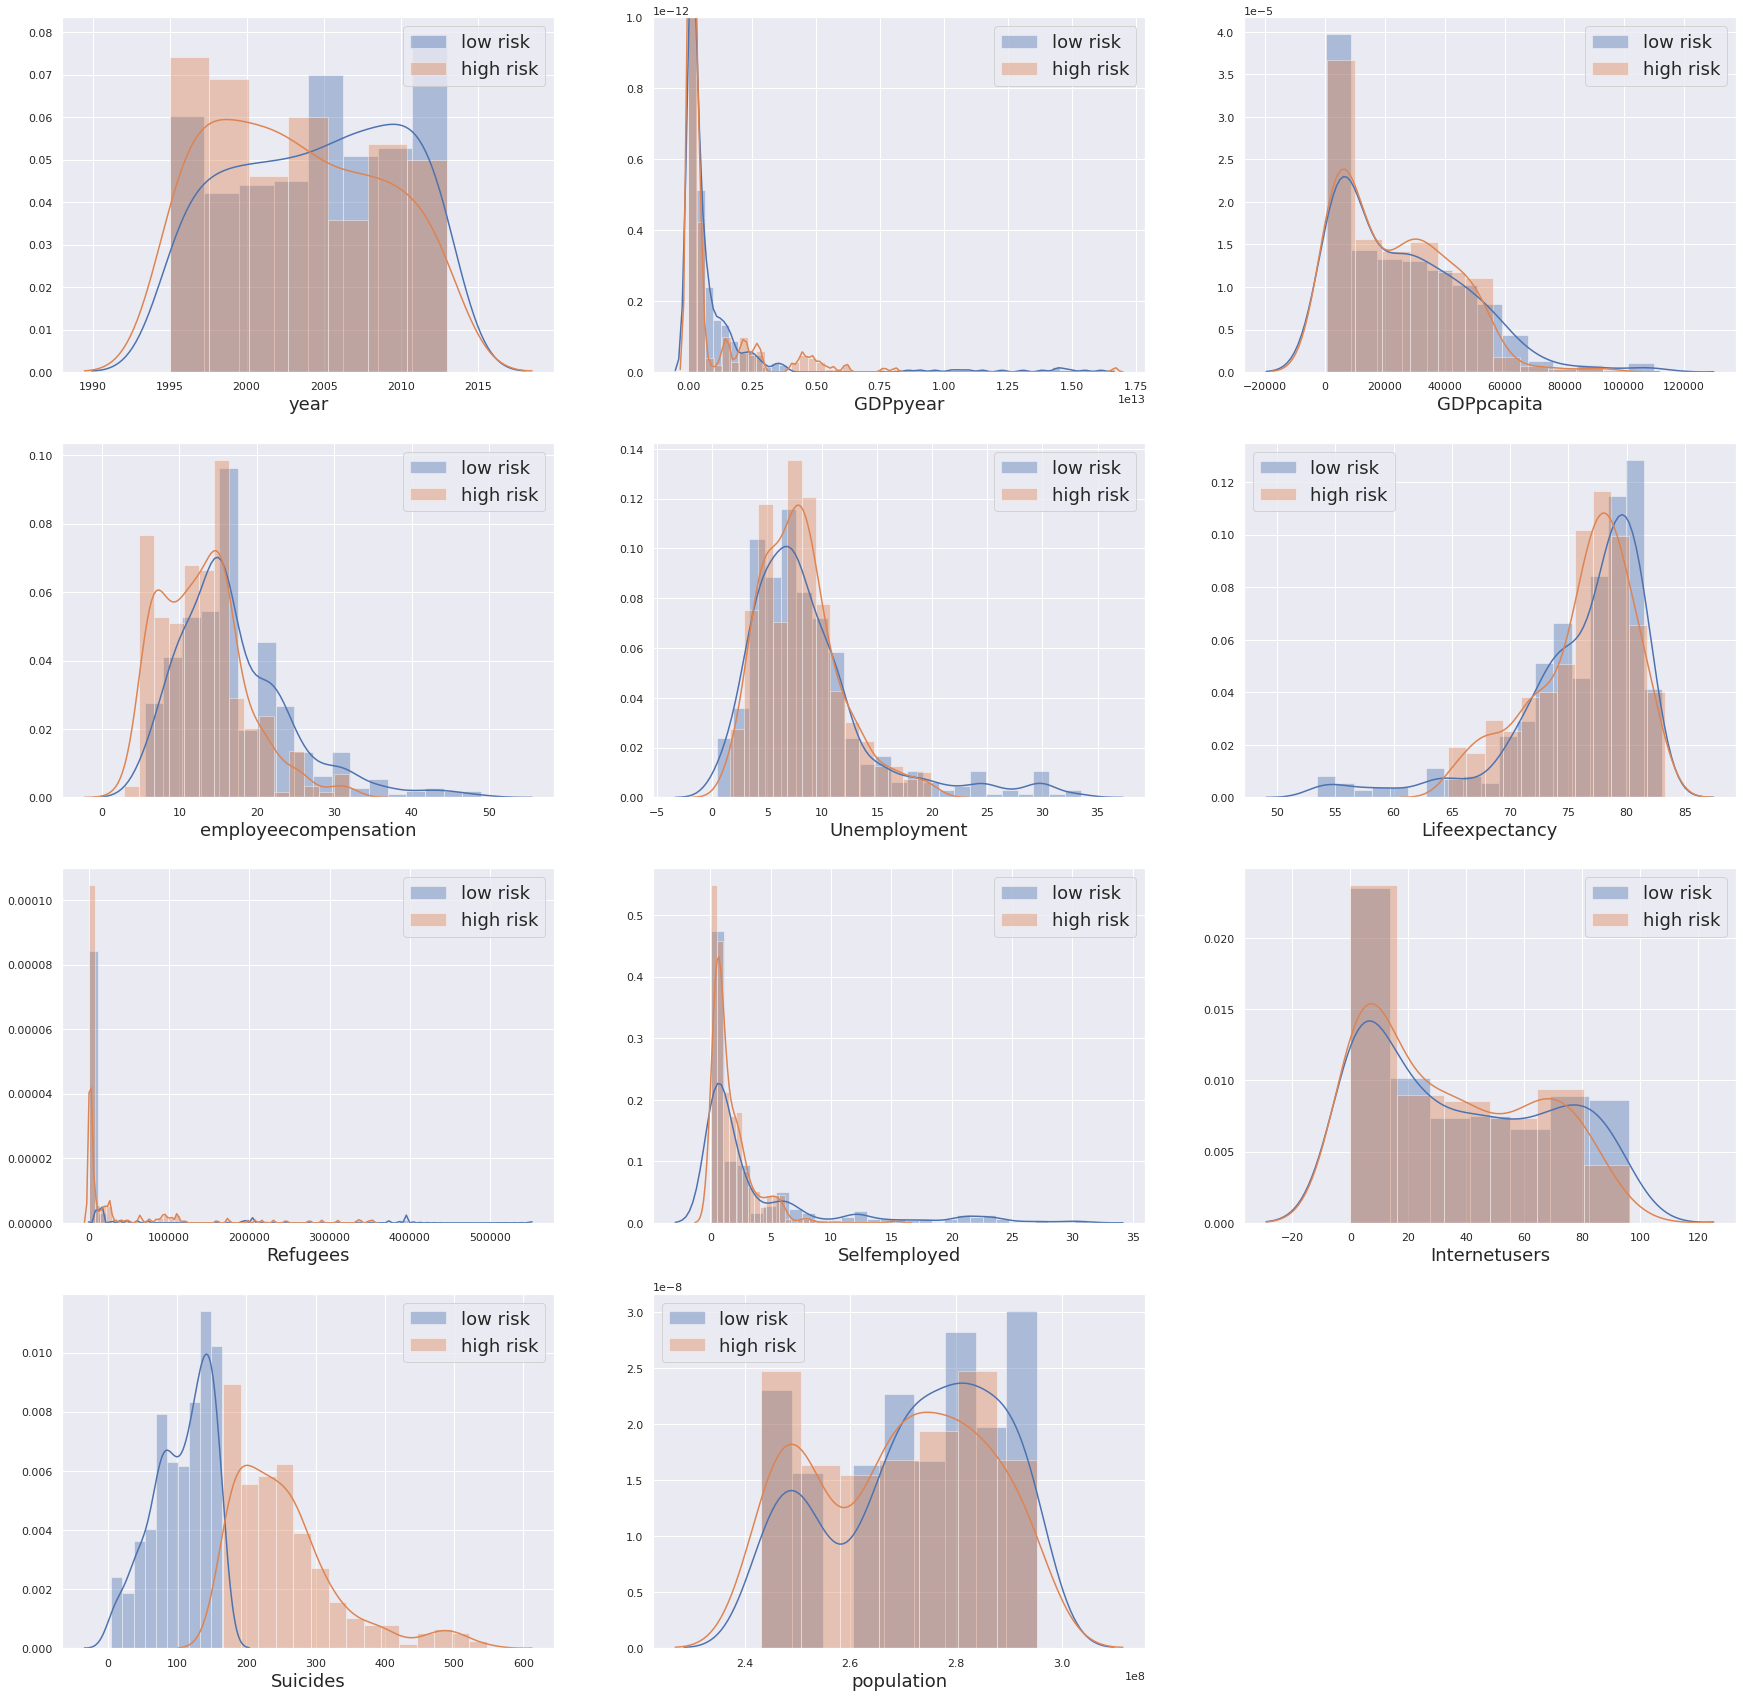

In [50]:
fig = plt.figure(figsize=(30, 30))

j = 0
for i, x in enumerate(total.columns[0:11]):
    plt.subplot(4, 3, j+1)
    j += 1
    sns.distplot(total[x][total.risk == 0], label='low risk')
    sns.distplot(total[x][total.risk == 1], label='high risk')       
    plt.legend(loc='best', fontsize=18)  
    plt.xlabel(x, fontsize=18)

# Model development 
 I'm using four different classification methods, optimize each, compare the performance of models and extract the feature importance for each model. Based on the EDA results, I expect nonlinear classification to perform better on this data. 

models explored in this work are:
 1. Logistic regression
 2. Decision tree
 3. Random forest
 4. MLP classifiere (Neural Network)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report


LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train, y_train)

yLRhat = LR.predict(X_test)

yLRhat_prob = LR.predict_proba(X_test)


print('precision_recall_fscore_support', precision_recall_fscore_support(y_test, yLRhat, average='weighted'))

cm = confusion_matrix(y_test, yLRhat)
print('\n confusion matrix \n', cm)

print('classification report for Logistic Regression\n', classification_report(y_test, yLRhat))

precision_recall_fscore_support (0.7241902834008097, 0.71875, 0.7207692307692307, None)

 confusion matrix 
 [[90 30]
 [24 48]]
classification report for Logistic Regression
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       120
           1       0.62      0.67      0.64        72

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.72      0.72      0.72       192



In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


DT = DecisionTreeClassifier(criterion="entropy", max_depth=7, max_leaf_nodes=30)
DT = DT.fit(X_train, y_train)
ydthat = DT.predict(X_test)

print('******************Decision Tree classifier**************')

print('Accuracy =', DT.score(X_test, y_test))
print('Train Accuracy=', DT.score(X_train, y_train))
print('CM\n', confusion_matrix(y_test, ydthat))
print('classification report for decision tree\n', classification_report(y_test, ydthat))
print('# of leaves', DT.get_n_leaves(), '\n Depth', DT.get_depth())


DTfeat_importance = DT.feature_importances_
DTfeat_importance = pd.DataFrame([totalfeatures, DT.feature_importances_]).T


print(DTfeat_importance.sort_values(by=1, ascending=False))
print('\n# of features= ', DT.n_features_)

******************Decision Tree classifier**************
Accuracy = 0.9166666666666666
Train Accuracy= 0.9548611111111112
CM
 [[111   9]
 [  7  65]]
classification report for decision tree
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       120
           1       0.88      0.90      0.89        72

    accuracy                           0.92       192
   macro avg       0.91      0.91      0.91       192
weighted avg       0.92      0.92      0.92       192

# of leaves 28 
 Depth 7
                       0          1
8           Selfemployed   0.222048
4   employeecompensation   0.198363
2               GDPpyear   0.170024
7               Refugees   0.161434
0                country   0.152636
6         Lifeexpectancy  0.0499141
3             GDPpcapita   0.033658
9          Internetusers  0.0119225
1                   year          0
5           Unemployment          0
10            population          0

# of features=  11


# Model performance optimization
# shown for the decision tree classifier only.

In [53]:
# USing Area under curve of ROC curve as the metric. This shows how much our classification is better than just
# randomly chosen classes

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, ydthat)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9138888888888889

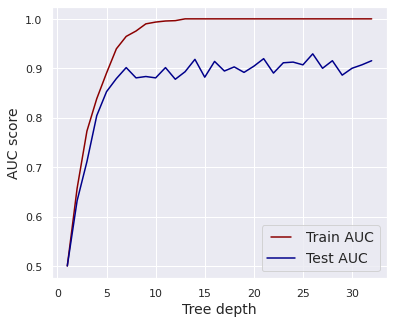

In [54]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths: 
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
plt.figure(figsize=(6, 5))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'DarkRed', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'DarkBlue', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, fontsize=14)
plt.ylabel('AUC score', fontsize=14)
plt.xlabel('Tree depth', fontsize=14)
plt.show()

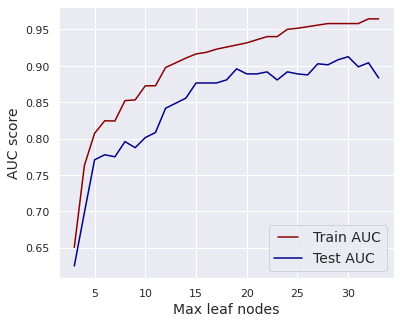

In [55]:
max_leaf_nodes = np.linspace(3, 33, 31, endpoint=True).astype(int)
train_results = []
test_results = []

for max_leaf_nodes in max_leaf_nodes: 
    dt2 = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, max_depth=7)
    dt2.fit(X_train, y_train)
    train_pred = dt2.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    # Add auc score to previous train results
    train_results.append(roc_auc)

    y_pred = dt2.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
    
plt.figure(figsize=(6, 5))
    
line1, = plt.plot(np.linspace(3, 33, 31, endpoint=True), train_results, 'DarkRed', label='Train AUC')
line2, = plt.plot(np.linspace(3, 33, 31, endpoint=True), test_results, 'DarkBlue', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)}, fontsize=14)
plt.ylabel('AUC score', fontsize=14)
plt.xlabel('Max leaf nodes', fontsize=14)
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_split=2, min_samples_leaf=5,
                                       max_leaf_nodes=20, max_features=len(totalfeatures)) 

random_forest.fit(X_train, y_train)

yrfhat = random_forest.predict(X_test)
feat_importance = random_forest.feature_importances_
rffeat_importance = pd.DataFrame([totalfeatures, random_forest.feature_importances_]).T

print('******************Random forest classifier**************')
print('Accuracy on training data', random_forest.score(X_train, y_train))
print('Accuracy on test data', random_forest.score(X_test, y_test))
print('CM\n', confusion_matrix(y_test, yrfhat))
print('Classification report for random forest\n', classification_report(y_test, yrfhat))
print(rffeat_importance.sort_values(by=1, ascending=False))

******************Random forest classifier**************
Accuracy on training data 0.9652777777777778
Accuracy on test data 0.9583333333333334
CM
 [[116   4]
 [  4  68]]
Classification report for random forest
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       120
           1       0.94      0.94      0.94        72

    accuracy                           0.96       192
   macro avg       0.96      0.96      0.96       192
weighted avg       0.96      0.96      0.96       192

                       0           1
8           Selfemployed     0.21651
4   employeecompensation    0.185855
7               Refugees    0.162279
0                country    0.155708
2               GDPpyear    0.118931
3             GDPpcapita   0.0534492
5           Unemployment   0.0475414
9          Internetusers   0.0244733
6         Lifeexpectancy   0.0241907
1                   year   0.0062025
10            population  0.00485957


In [57]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', max_iter=1000, alpha=1e-4,
                   hidden_layer_sizes=(4, 4), random_state=4)

NN.fit(X_train, y_train)
y_predict = NN.predict(X_test)
cmMLP = confusion_matrix(y_test, y_predict)


print("Training set score:", NN.score(X_train, y_train))
print("Test set score:", NN.score(X_test, y_test))
print('minimum loss achived=', NN.loss_)
print('confusion matrix for MLPclassifier from scikit learn\n', cmMLP)
print('classification reportfor MLPclassifier from scikit learn\n', classification_report(y_test, y_predict))

Training set score: 0.9253472222222222
Test set score: 0.8854166666666666
minimum loss achived= 0.18213149462310352
confusion matrix for MLPclassifier from scikit learn
 [[110  10]
 [ 12  60]]
classification reportfor MLPclassifier from scikit learn
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       120
           1       0.86      0.83      0.85        72

    accuracy                           0.89       192
   macro avg       0.88      0.88      0.88       192
weighted avg       0.88      0.89      0.89       192



In [58]:
!pip install eli5

In [59]:
import sklearn
from eli5.sklearn import PermutationImportance
from eli5.permutation_importance import get_score_importances
sorted(sklearn.metrics.SCORERS.keys())


def score(X, y):
    
    y_pred = NN.predict(X)
 
    return accuracy_score(y, y_pred)

base_score, score_decreases = get_score_importances(score, X_test, y_test)
feature_importances = np.mean(score_decreases, axis=0)

NNfeatureimportance = pd.DataFrame(totalfeatures, feature_importances)
NNfeatureimportance.reset_index(inplace=True)
NNfeatureimportance.columns = ['importance', 'feature']
NNfeatureimportance.sort_values(by='importance', ascending=False)

,importance,feature
6,0.196875,Lifeexpectancy
8,0.162500,Selfemployed
0,0.152083,country
4,0.147917,employeecompensation
9,0.143750,Internetusers
3,0.130208,GDPpcapita
1,0.119792,year
2,0.091667,GDPpyear
10,0.036458,population
5,0.036458,Unemployment


# Classification performance comparison/ROC plot

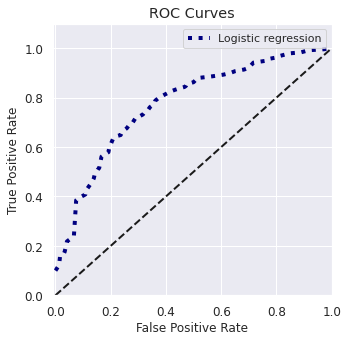

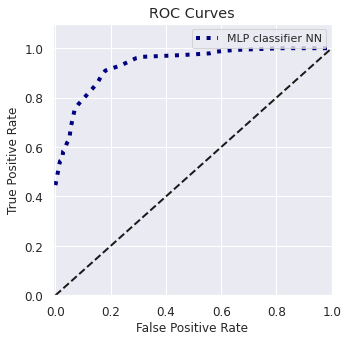

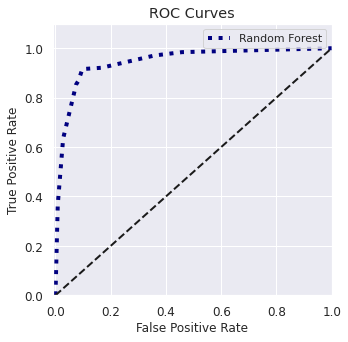

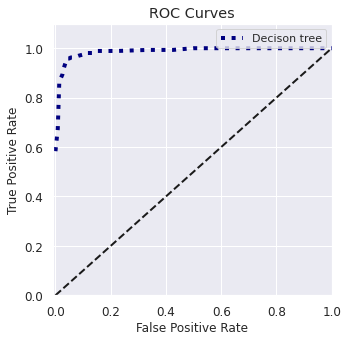

In [60]:
models = [LR, NN, DT, random_forest]
modelnames = ['Logistic regression', 'MLP classifier NN', 'Random Forest', 'Decison tree']


for i, x in enumerate(models):
    
    y_true = y_test
    y_probas = x.predict_proba(X_test)
    ax1 = skplt.metrics.plot_roc(y_true, y_probas, plot_micro=False, plot_macro=True, classes_to_plot=[], figsize=(5, 5))
    plt.axis((-0.01, 1, 0, 1.1))
    plt.legend([modelnames[i]], loc='best')

# k-fold cross validation to minimize overfitting

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
rfscores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')

rfpredictions = cross_val_predict(random_forest, X_train, y_train)

print('CM for random forest with cross validation\n', confusion_matrix(y_train, rfpredictions))
print('classification report for random forest with CV \n', classification_report(y_train, rfpredictions))

dtscores = cross_val_score(DT, X_train, y_train, cv=5, scoring='accuracy')
DTpredictions = cross_val_predict(DT, X_train, y_train)

print('CM for Decision tree with cross validation\n', confusion_matrix(y_train, DTpredictions))
print('classification report for Decision tree with CV \n', classification_report(y_train, DTpredictions))

nnscores = cross_val_score(NN, X_train, y_train, cv=5, scoring='accuracy')
NNpredictions = cross_val_predict(NN, X_train, y_train)

print('CM for MLP classifier  with cross validation\n', confusion_matrix(y_train, NNpredictions))
print('classification report for MLP classifier with CV \n', classification_report(y_train, NNpredictions))

CM for random forest with cross validation
 [[320  24]
 [ 32 200]]
classification report for random forest with CV 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       344
           1       0.89      0.86      0.88       232

    accuracy                           0.90       576
   macro avg       0.90      0.90      0.90       576
weighted avg       0.90      0.90      0.90       576

CM for Decision tree with cross validation
 [[310  34]
 [ 32 200]]
classification report for Decision tree with CV 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       344
           1       0.85      0.86      0.86       232

    accuracy                           0.89       576
   macro avg       0.88      0.88      0.88       576
weighted avg       0.89      0.89      0.89       576

CM for MLP classifier  with cross validation
 [[311  33]
 [ 58 174]]
classification report for MLP classifier wi

# Feature importance results summary
The bar plot summarizes the feature importances from  different classification results. But what are the true causes? There are some overlaps in feature importances between different classification methods, and there are also some disagreements. This is why one can not trust the results of a single model. As scientists, we should learn not to panic when encountering controversies. Controversies are indeed built in to the scientific method. Instead, we should try to explore other resources and feed more insight into the picture we are exploring. The truth is all models are wrong, but some are useful!

Feature importance results for the three best models
random forest accuracy score (5-fold cross validation)= 0.9183508245877061 +/- 0.03439247682019363
Decison Tree accuracy score (5-fold cross validation)= 0.8818290854572715 +/- 0.09651417039050568
MLP classifier accuracy score (5-fold cross validation)= 0.8419940029985007 +/- 0.028224223533239036


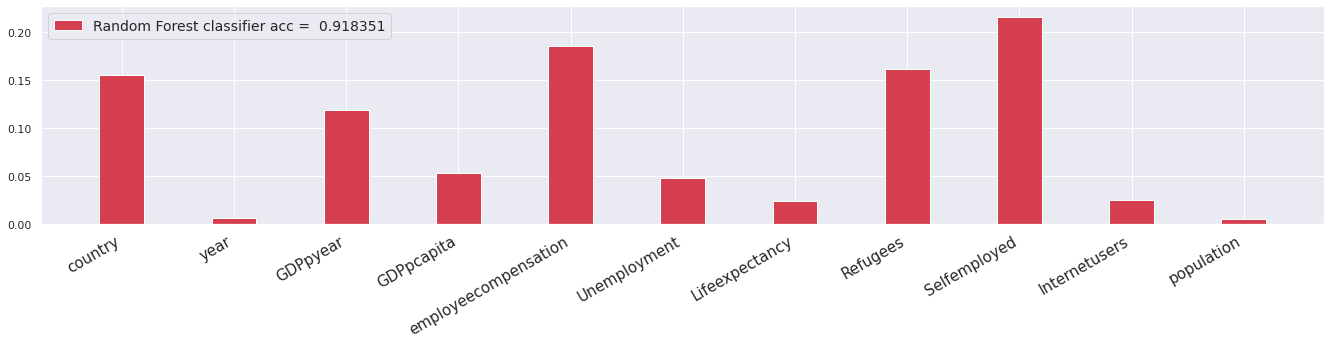

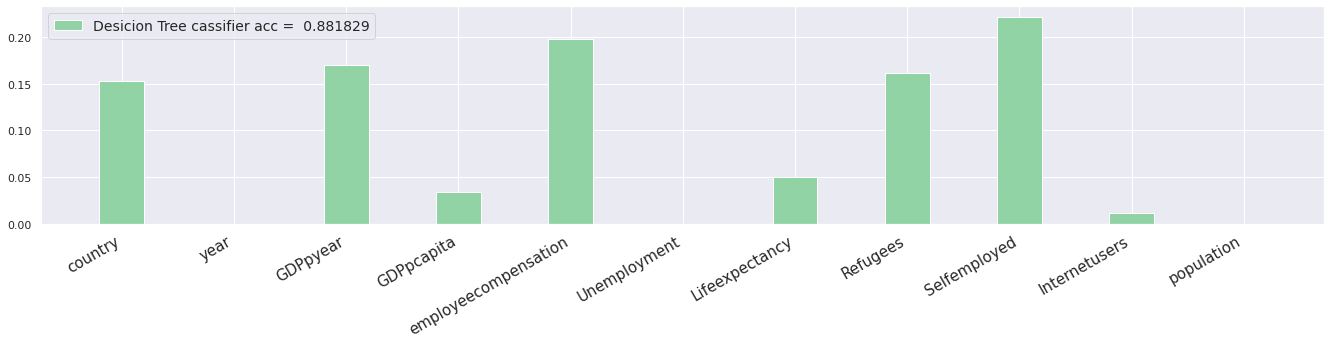

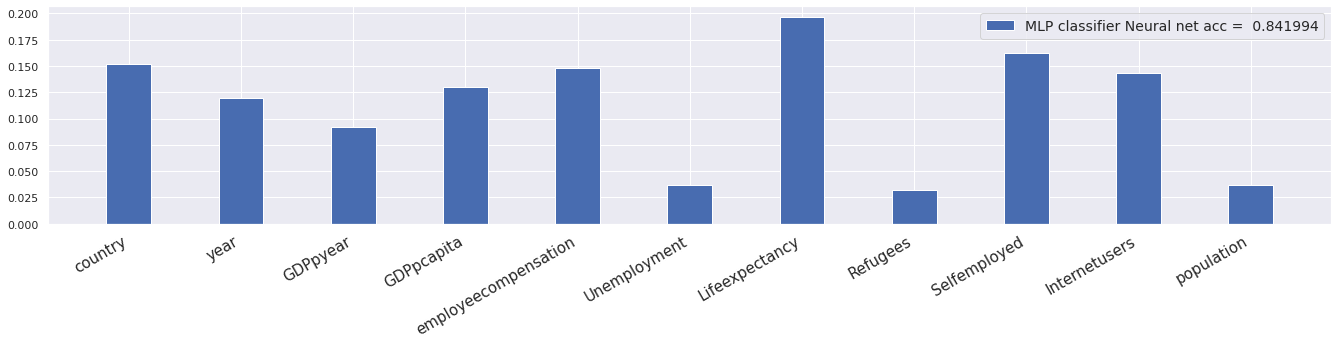

In [62]:
print('Feature importance results for the three best models')
print('random forest accuracy score (5-fold cross validation)=', rfscores.mean(), '+/-', rfscores.std()*2)

plt.figure(figsize=(23, 4))
plt.bar(rffeat_importance[0], rffeat_importance[1], color=col[2], width=0.4,)
plt.xticks(ha='right', rotation=30, fontsize=15)
plt.legend(['Random Forest classifier acc = % f'% rfscores.mean()], fontsize=14)

print('Decison Tree accuracy score (5-fold cross validation)=', dtscores.mean(), '+/-', dtscores.std()*2)
plt.figure(figsize=(23, 4))
plt.bar(DTfeat_importance[0], DTfeat_importance[1], color=col[14], width=0.4)
plt.legend(['Desicion Tree cassifier acc = % f'% dtscores.mean()], fontsize=14)
plt.xticks(ha='right', rotation=30, fontsize=15)

print('MLP classifier accuracy score (5-fold cross validation)=', nnscores.mean(), '+/-', nnscores.std()*2)
plt.figure(figsize=(23, 4))
plt.bar(NNfeatureimportance['feature'], NNfeatureimportance['importance'], color=col[18], width=0.4)
plt.legend(['MLP classifier Neural net acc = % f'% nnscores.mean()], fontsize=14);
plt.xticks(ha='right', rotation=30, fontsize=15);
